

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>'popularity': this tells how popular a particluar movie is 

>'budget' : this tells the budget of a movie when it was produced

>'revenue' : this revenue the budget of a movie when it was produced

>'cast' : the list the casts who are present in the movies

>'director' : this is the director who(s) directed the movie

>'tagline' : this are short text which serves to clarify an idea for, or is designed with a form of, dramatic effect

>'keywords' : this is a word (or group of connected words) attached to a the movie to describe any notable object, concept, style or action that takes place during a title

>'overview' : a brief summary of a completed screenplay's core concept, major plot points, and main character arcs

>'runtime' : its the duration of the movie, the amount of time the movie takes to show

>'genres' : its the genre(s) a particular mpvie belongs to

>'production_companies' : this is the company(s) involved with the production of the movie

>'release_date' : this is the date a movie is released

>'vote_count' : amount of vote a particlar movie gathered

>'vote_average' : the vote_average of a movie

>'release_year' : this is the year a particular movie is released

>'budget_adj' : this is the adjusted budget of the movie show the budget of the movie in terms of 2010 dollars, 
accounting for inflation over time

>'revenue_adj' :  this is the adjusted revenue of the movie show the revenue of the movie in terms of 2010 dollars, accounting for inflation over time



### Question(s) for Analysis
⏺what determins the revenue of a movie <br>
⏺Do vote count correlates with popularity of movie<br>
⏺what gernes have the most budget, revenue, total_budget and profit/loss<br>
⏺what gerne of movie has the highest percentage of profit<br>
⏺DO DIRECTORS HAS EFFECT ON THE REVENUE OF THE MOVIE <br>
⏺who are the casts who appeared in movies who has the most average revenue/porofit/loss <br>
⏺Do cast has effect revnue and profit of movie, and who are the cast with it


In [447]:


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
#pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



> the wrangle function is use to load the data set and perform some preprocessing

In [366]:
def wrangle(file):
    df = pd.read_csv(file)
    df.drop(columns = ['imdb_id', 'id', 'original_title', 'homepage', 'overview'], axis = 1, inplace = True)
    return df

In [528]:
df = wrangle('/Users/abubakri/Downloads/tmdb-movies.csv')
df

,popularity,budget,revenue,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


> id and imdb_id, original_title, home_page and overview columns are of high cardinality values (unique for each row observation), so they will be dropped using the wrangle function 

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   tagline               8042 non-null   object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [449]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> many movies shows revenue and budget to be zero or less than 1000 which is not ideal, to be able to get what influence revenue, the columns with less than 1000 as budget and revenue will be dropped

In [450]:
#movie which their revenue  and budget is not less than 1000
df_1 = df[(df['budget_adj'] > 1000) & (df['revenue_adj'] >1000)]
df_1

,popularity,budget,revenue,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,You are cordially invited to George and Martha...,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,It tears you apart with suspense!,cold war|east germany,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,It's the Big One with the Big Two,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,This is the heroic story of the men on the U.S...,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (BUDGET OF MOVIE AND ITS REVENUE!)

##### popularity and budget seems to be negatively skewed, a boxplot will be run to check it, the adjusted column [revenue_adj, budget_adj] will be used becasue it 

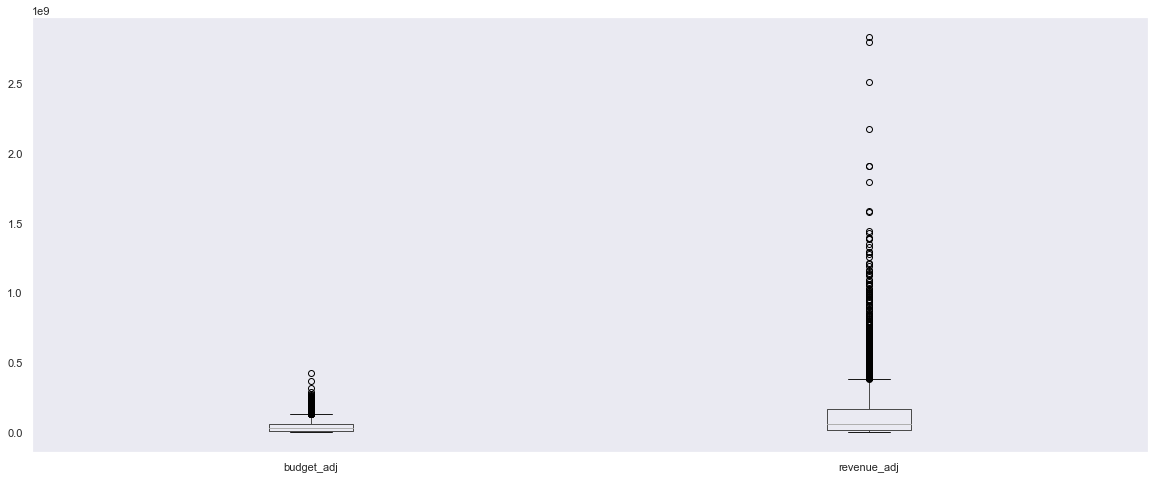

In [451]:

df_1.boxplot(column = ['budget_adj', 'revenue_adj'], grid = False, figsize=(20, 8))
plt.show()

In [452]:
df_1.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3820.000000,3.820000e+03,3.820000e+03,3820.000000,3820.000000,3820.000000,3820.000000,3.820000e+03,3.820000e+03
mean,1.197872,3.746006e+07,1.086128e+08,109.307853,531.473037,6.170052,2001.280890,4.453979e+07,1.382208e+08
std,1.479861,4.225732e+07,1.770395e+08,19.842229,882.829213,0.794036,11.296889,4.482926e+07,2.166912e+08
min,0.001117,6.000000e+03,1.938000e+03,26.000000,10.000000,2.200000,1960.000000,6.310011e+03,1.840604e+03
25%,0.465197,1.000000e+07,1.413532e+07,96.000000,72.000000,5.700000,1995.750000,1.336182e+07,1.910216e+07
50%,0.804415,2.400000e+07,4.586267e+07,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.245848e+07
75%,1.380126,5.000000e+07,1.255494e+08,119.000000,583.000000,6.700000,2010.000000,6.076720e+07,1.648108e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


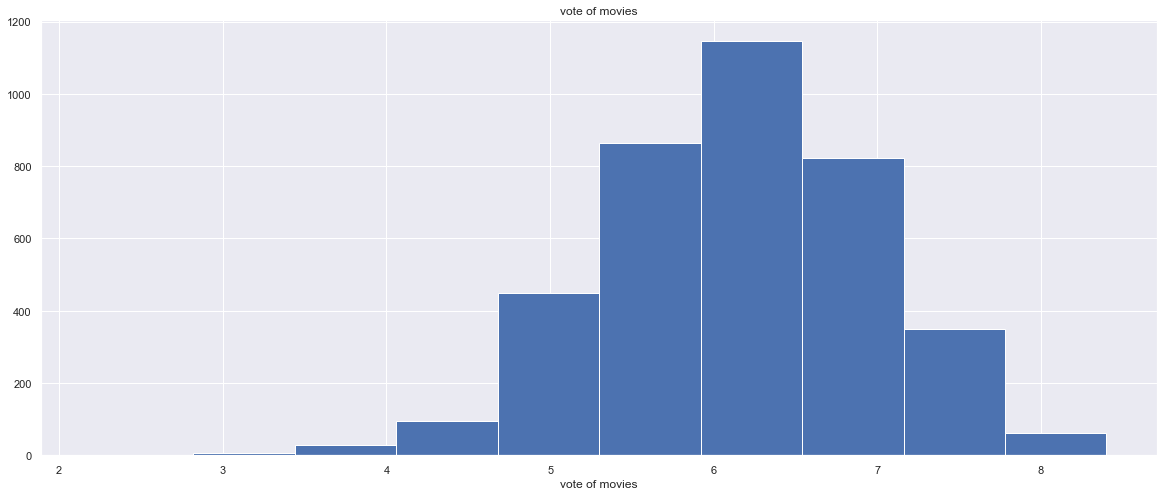

In [453]:
plt.figure(figsize=(20,8))
plt.hist(df_1['vote_average'])
plt.xlabel('vote of movies')
plt.title('vote of movies')
plt.show()

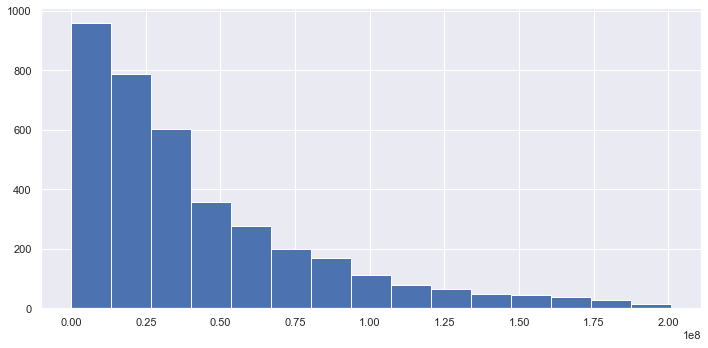

In [454]:
#plotting graph to see the 99th percentile of the dudget
budget_99th = df_1['budget_adj'][df_1['budget_adj']<= df_1['budget_adj'].quantile(0.99)]
fig, axs= plt.subplots(figsize = (10, 5), tight_layout = True)
axs.hist(budget_99th, bins = 15)
plt.show()
#plt.hist()

>most movie have budget with below $10000000

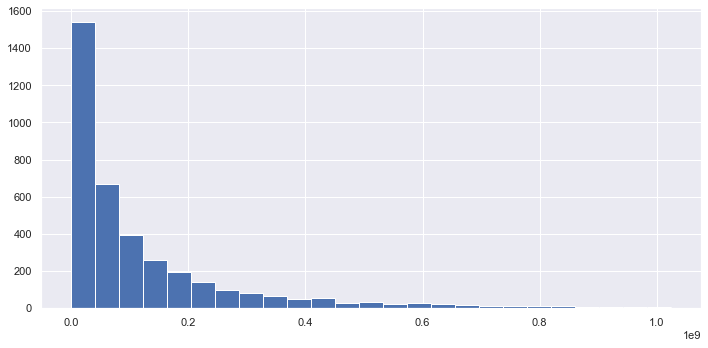

In [455]:
revenue_99th = df_1['revenue_adj'][df_1['revenue_adj']<= df_1['revenue_adj'].quantile(0.99)]
fig, axs= plt.subplots(figsize = (10, 5), tight_layout = True)
axs.hist(revenue_99th, bins = 25)
plt.show()
#plt.hist()

> most movie have budget with below $30000000

Text(0.5, 1.0, 'graph of budget vs revenue')

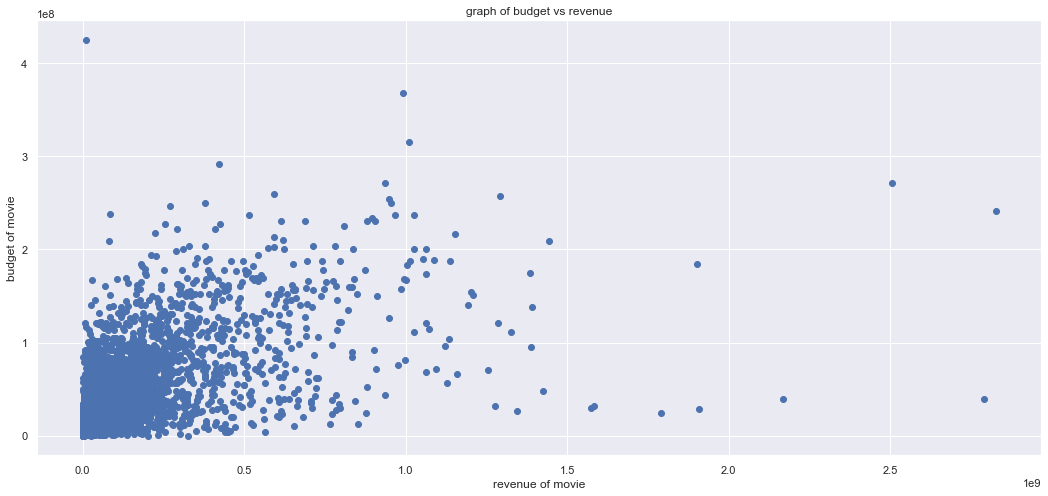

In [456]:
plt.figure(figsize=(18,8))
plt.scatter( df_1['revenue_adj'], df_1['budget_adj'])
plt.xlabel('revenue of movie')
plt.ylabel('budget of movie')
plt.title('graph of budget vs revenue')

Text(0.5, 1.0, 'graph of budget vs revenue')

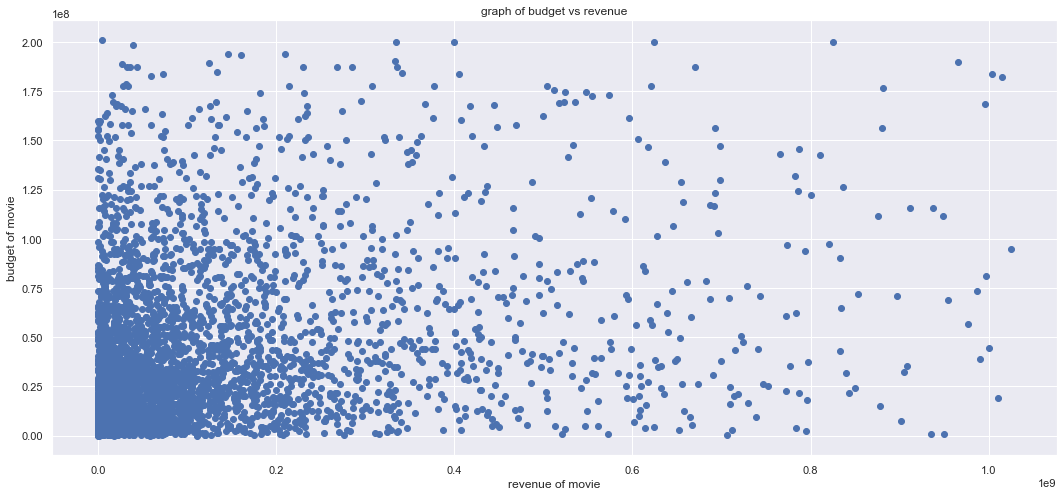

In [457]:
#scatter plot without outliers
plt.figure(figsize=(18,8))
plt.scatter(revenue_99th,  budget_99th)
plt.xlabel('revenue of movie')
plt.ylabel('budget of movie')
plt.title('graph of budget vs revenue')

>The graphs above shows that revenue of a movie also increases as the bugdet increase, which means if theres more budget, its a little likely there will be more revenue to be generated, 

### Research Question 2  (Popularity of  movie and Revenue)

> another column is created named **profit_loss_%**, movie getting more revenue doesnt really means in get a better profit, so the **profit_loss_%** columns holds the perecntsge of loss and profit of all movies 

In [458]:
df_1['profit_loss_%'] = round(((df_1['revenue_adj'] - df_1['budget_adj'])/ df_1['budget_adj'])* 100, 2)

/var/folders/2b/ygh4jxln1kb938b1vklc_xpw0000gn/T/ipykernel_7109/3738420692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['profit_loss_%'] = round(((df_1['revenue_adj'] - df_1['budget_adj'])/ df_1['budget_adj'])* 100, 2)


In [459]:
df_1['profit_loss_%']

0        909.02
1        152.29
2        168.40
3        934.09
4        692.76
          ...  
10822    349.82
10828    333.33
10829     28.95
10835     66.67
10848    134.60
Name: profit_loss_%, Length: 3820, dtype: float64

Text(0.5, 1.0, ' budget vs movie')

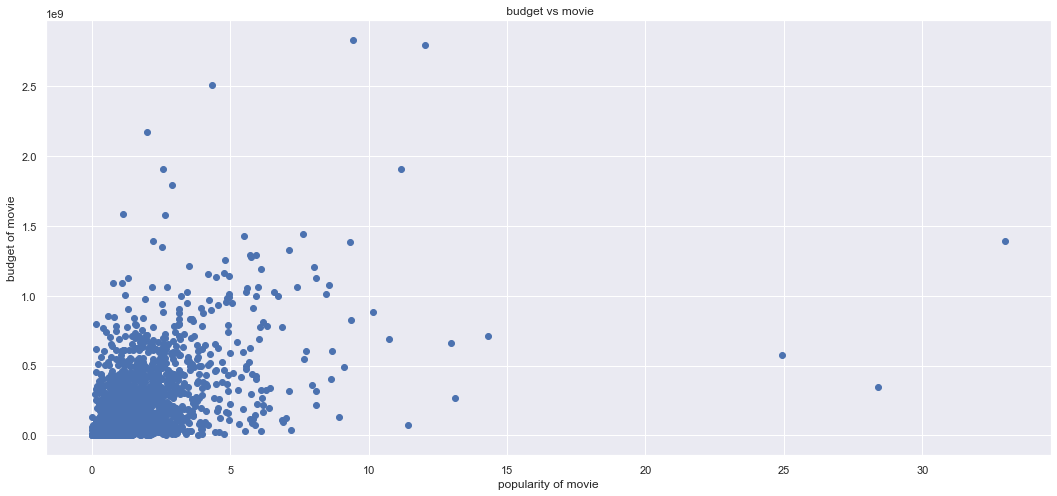

In [460]:
plt.figure(figsize=(18,8))
plt.scatter(  df_1['popularity'], df_1['revenue_adj'])
plt.xlabel('popularity of movie')
plt.ylabel('budget of movie')
plt.title(' budget vs movie')

Text(0.5, 1.0, ' popularity vs profit_loss_% movie ')

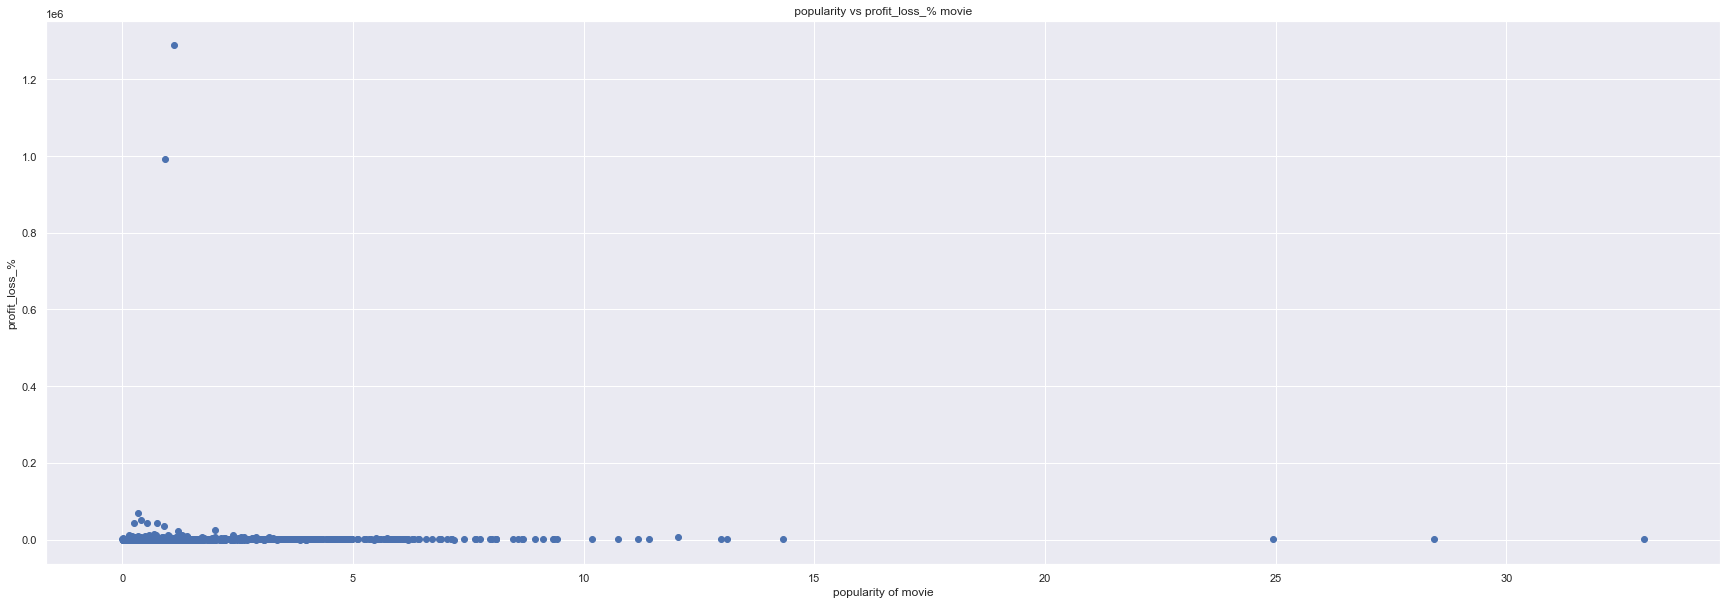

In [461]:
plt.scatter(  df_1['popularity'], df_1['profit_loss_%'])
plt.xlabel('popularity of movie')
plt.ylabel('profit_loss_%')
plt.title(' popularity vs profit_loss_% movie ')

> the scatter plot doesnt show the actual visual because of movies with very high profit_loss_%, so movies with profit_loss_% > 1000 is then removed from the visualisation

Text(0.5, 1.0, ' popularity vs profit/loss_in_% movie [without outlires]')

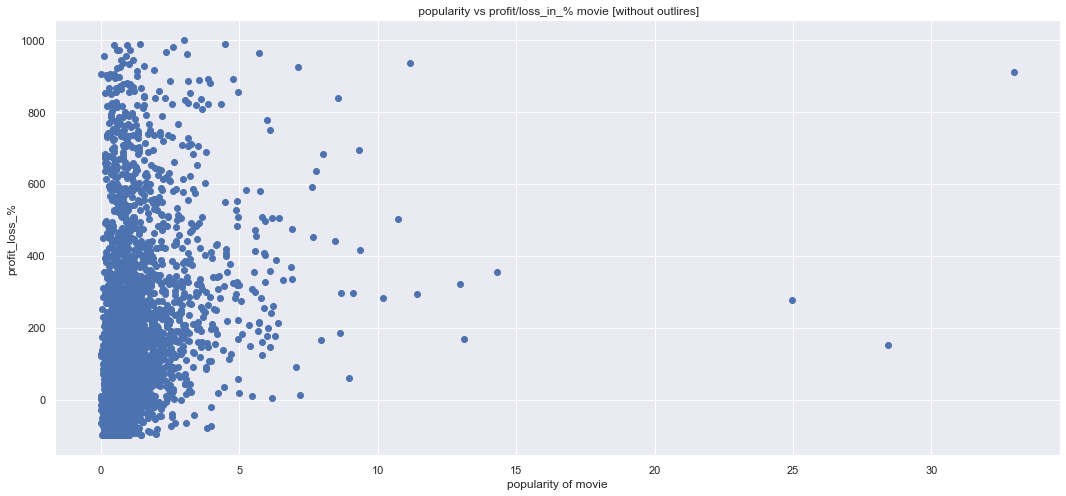

In [462]:
plt.figure(figsize=(18,8))
plt.scatter(df_1[df_1['profit_loss_%']< 1000]['popularity'], df_1[df_1['profit_loss_%']< 1000]['profit_loss_%'])
plt.xlabel('popularity of movie')
plt.ylabel('profit_loss_%')
plt.title(' popularity vs profit/loss_in_% movie [without outlires]')

#### The scatter plots above shows that  the more poopular a movie is, the  more revenue likely to be generated,
>the average profit% also tends to increases as the popularity increases. least popular movies shows to be the ones who has highest loss%(profit% below zero)

### Research Question 3  (Vote Count/vote average of movie vs revenue, budget (profit/loss%)!)

Text(0.5, 1.0, ' average_vote vs movie')

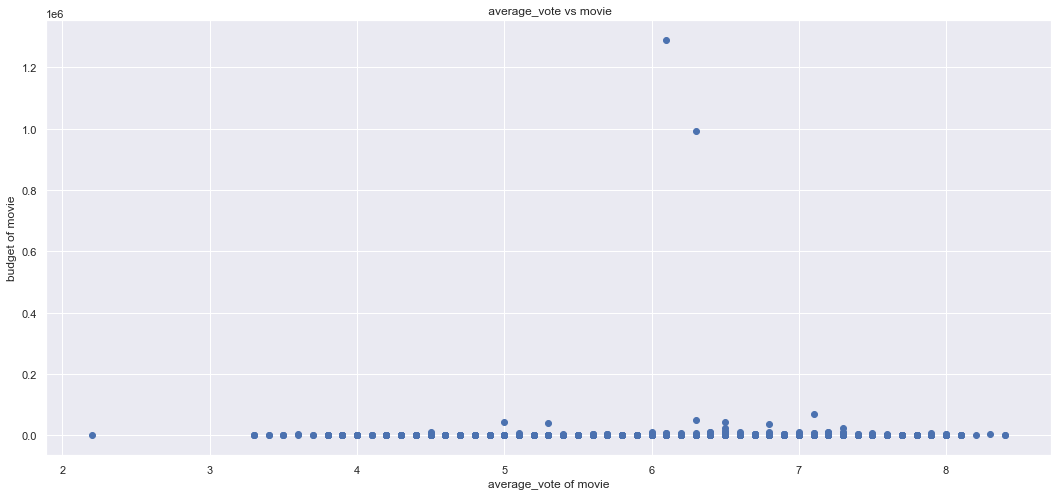

In [463]:
plt.figure(figsize=(18,8))
plt.scatter(  df_1['vote_average'], df_1['profit_loss_%'])
plt.xlabel('average_vote of movie')
plt.ylabel('budget of movie')
plt.title(' average_vote vs movie')

> the scatter plot doesnt show the actual visual because of movies with very high profit_loss_%, so movies with profit_loss_% > 1000 is then removed from the visualisation, so as to see the real relationship between votecounts and profit_loss_%' 

Text(0.5, 1.0, ' average_vote vs movie')

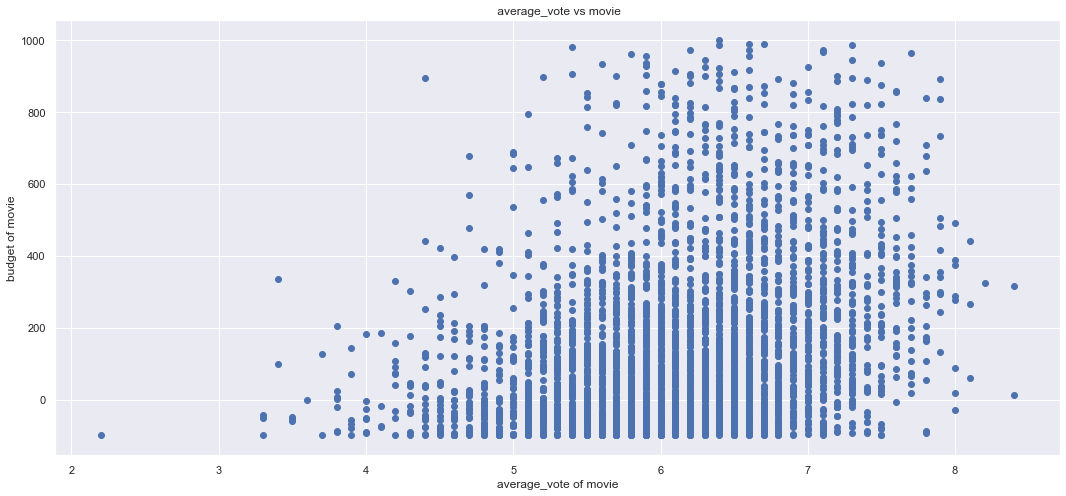

In [464]:
plt.figure(figsize=(18,8))
plt.scatter(  df_1[df_1['profit_loss_%']< 1000]['vote_average'], df_1[df_1['profit_loss_%']< 1000]['profit_loss_%'])
plt.xlabel('average_vote of movie')
plt.ylabel('budget of movie')
plt.title(' average_vote vs movie')

> the average vote  matters in the  profit/loss%  of a movie as the profit% increase along with average vote, it can be seen that movies with average vote more than 8 makes profit_in_%, while those below 3.4 are in loss

Text(0.5, 1.0, ' budget vs movie')

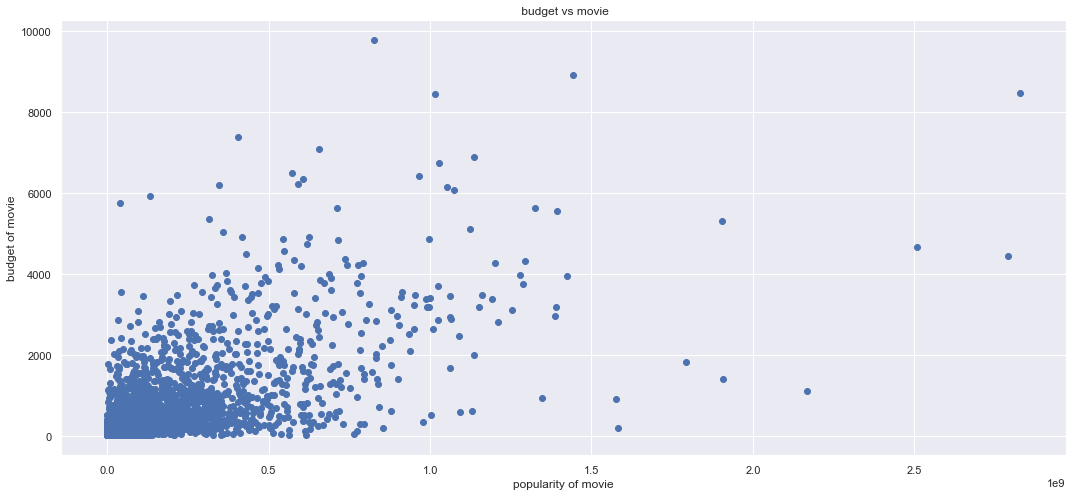

In [465]:
plt.figure(figsize=(18,8))
plt.scatter(df_1['revenue_adj'], df_1['vote_count'])
plt.xlabel('popularity of movie')
plt.ylabel('budget of movie')
plt.title(' budget vs movie')

> movies which are popular seems to have had higher budgets

Text(0.5, 1.0, ' average_vote vs movie')

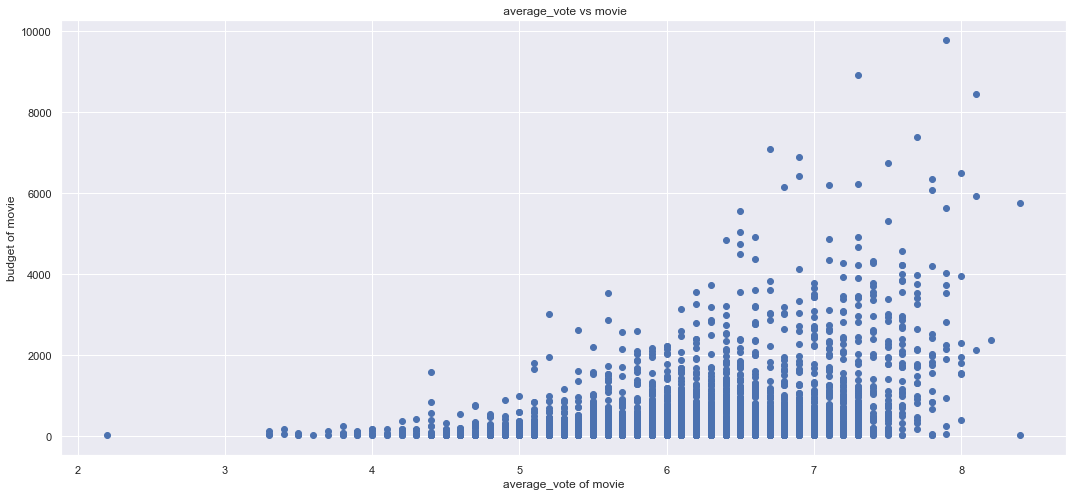

In [466]:
plt.figure(figsize=(18,8))
plt.scatter( df_1[df_1['profit_loss_%']< 1000]['vote_average'], df_1[df_1['profit_loss_%']< 1000]['vote_count'])
plt.xlabel('average_vote of movie')
plt.ylabel('budget of movie')
plt.title(' average_vote vs movie')


> the scatterplot shows that the amount of revenue/profits each movie gets iincreases along with to the vote counts, movie with higher vote counts will generates higher revenue/profit%

### Research Question 4  (budget/revenue  of all movies accross the years!)

Text(0.5, 1.0, 'revenue of movie over the years')

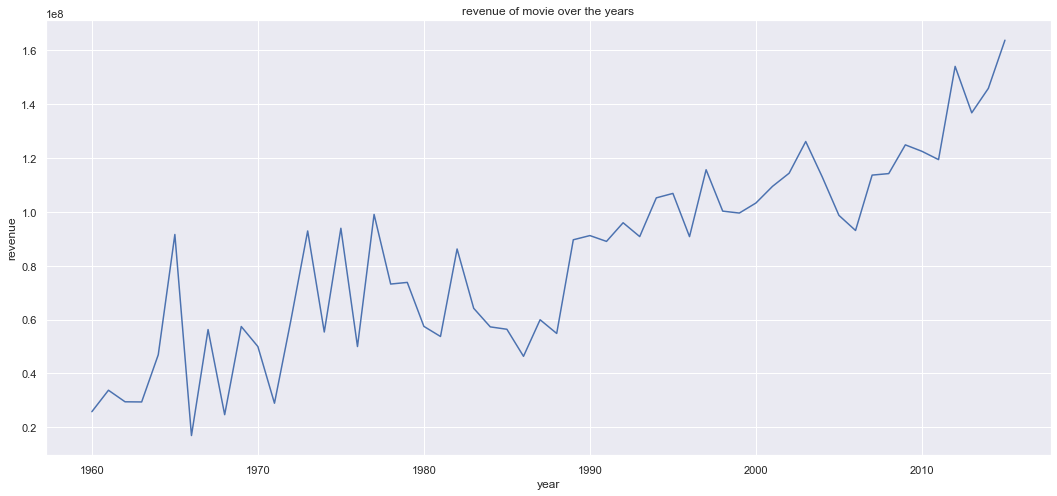

In [467]:
plt.figure(figsize=(18,8))
year = df_1.groupby('release_year')['revenue'].mean()
#plt.plot(df_1['release_year'], df_1['revenue'])
plt.plot(year)
plt.xlabel('year')
plt.ylabel('revenue')
plt.title('revenue of movie over the years')


Text(0.5, 1.0, 'revenue of movie over the years')

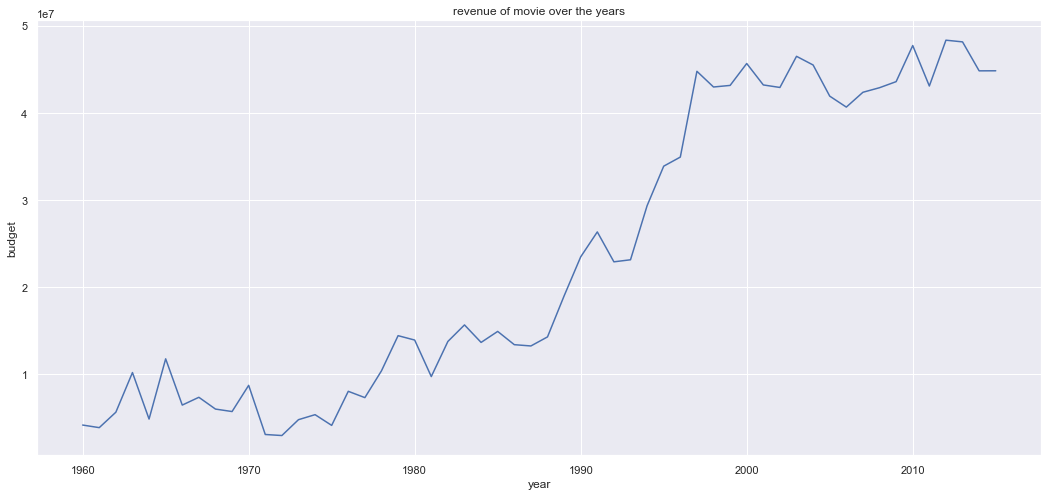

In [468]:
year = df_1.groupby('release_year')['budget'].mean()
#plt.plot(df_1['release_year'], df_1['revenue'])
plt.figure(figsize=(18,8))
plt.plot(year)
plt.xlabel('year')
plt.ylabel('budget')
plt.title('revenue of movie over the years')

> the line graphs shows that the  revenue and budget for  movies has been increases over the years

### Research Question 5  (Movie genre than has been most popular over the years!)

In [469]:
years = []
popularity = []
movie = []
#the for loop will iterate through each row of the dataframe
for ind in df_1.index:
    
    
    #it check if the year in the present row has been added to the years list outsite the for loop
    if df_1['release_year'][ind] not in years:
        #appends the year of the present row to the years list
        years.append(df_1['release_year'][ind])
        #appends the popularity of the present row to the years list
        popularity.append(df_1['popularity'][ind])
        #appends the gernes of the present row to the years list
        movie.append(df_1['genres'][ind])
        
    #if the year in the present row has been added to the list before    
    else:
        #it gets the index of the year in the years LIST 
        frm_index =  years.index(df_1['release_year'][ind])
        
        #it checks if the popularity of that index is less than the popularity of the current row of the df_1.index and updates the gerne, and popularity
        if popularity[frm_index] < df_1['popularity'][ind]:
            popularity[frm_index] = df_1['popularity'][ind]
            movie[frm_index] = df_1['genres'][ind]

df_top_rate_year = pd.DataFrame({'year': years, 'popularity': popularity, 'gerne': movie})
df_top_rate_year.sort_values( by = ['year']).reset_index().drop(columns = 'index', axis = 1)

,year,popularity,gerne
0,1960,2.610362,Drama|Horror|Thriller
1,1961,2.631987,Adventure|Animation|Comedy|Family
2,1962,3.170651,Adventure|Action|Thriller
3,1963,2.508235,Action|Thriller|Adventure
4,1964,3.153791,Adventure|Action|Thriller
5,1965,1.910465,Adventure|Action|Thriller
6,1966,0.670274,Drama
7,1967,2.550704,Family|Animation|Adventure
8,1968,3.309196,Science Fiction|Mystery|Adventure
9,1969,1.778746,Adventure|Action|Thriller


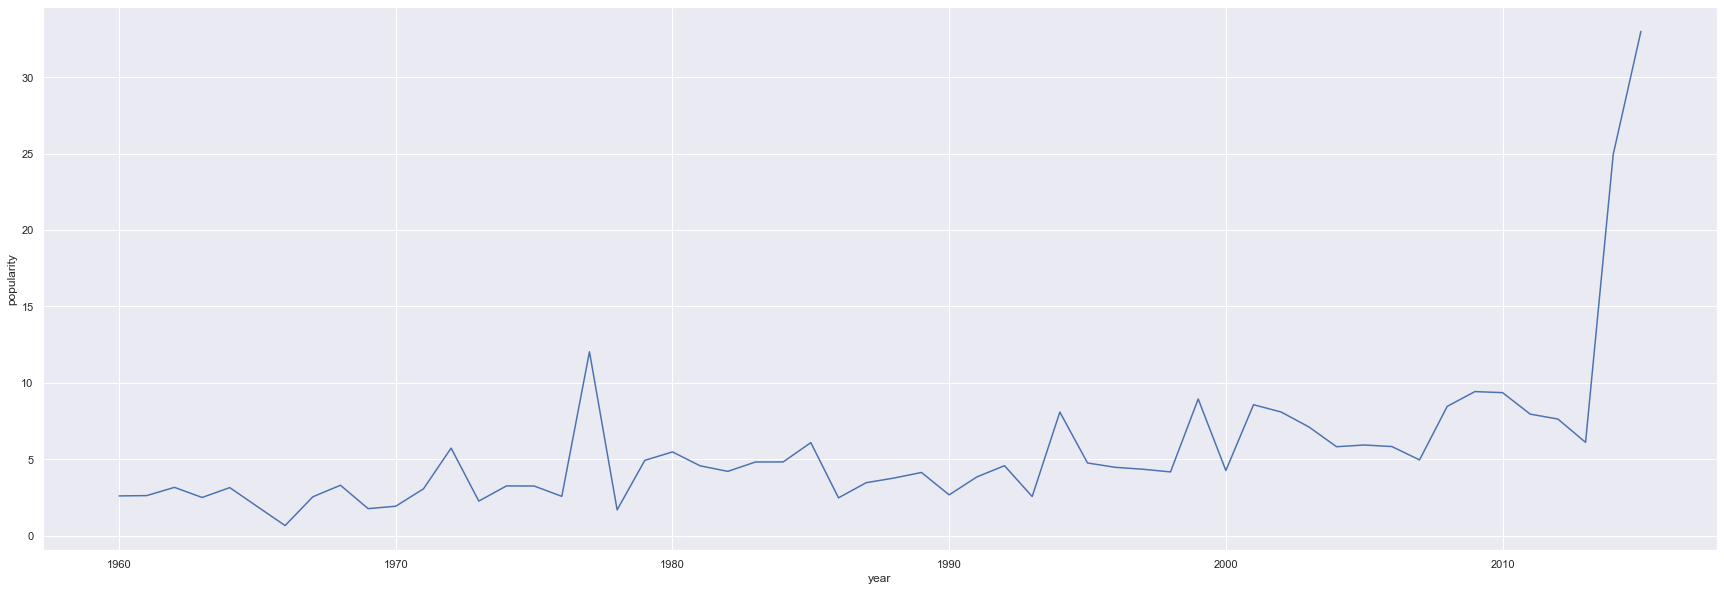

In [470]:
sns.lineplot(x = 'year', y = 'popularity', data = df_top_rate_year)
sns.set(rc={'figure.figsize':(30,10)})


> the lineplot graph shows that the popularity of movies increases over the years and theres a suden spike from average popularity of 6.11 in 2013 to 24.98 in 2014 and 32.98 in 2015

<BarContainer object of 14 artists>

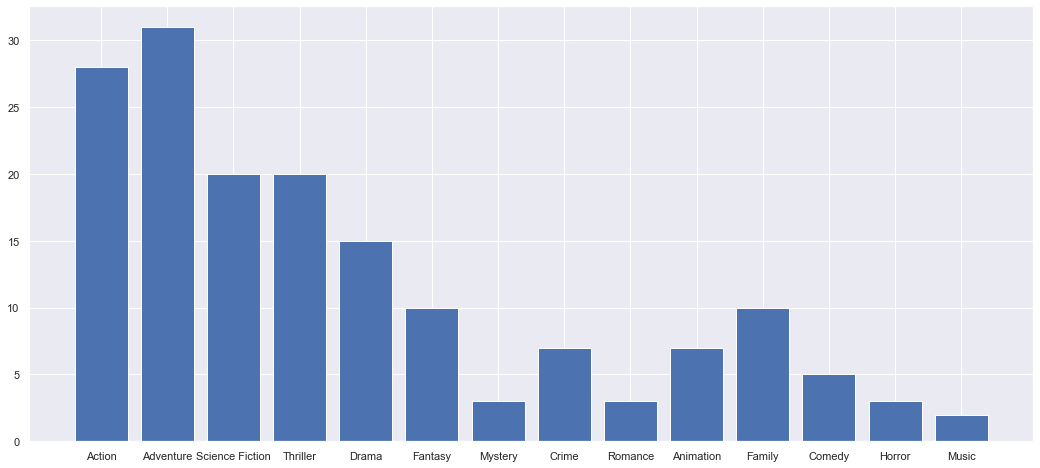

In [471]:
from collections import Counter
gernes = []
for i in df_top_rate_year['gerne'].map(lambda x: x.split("|")):
    for x in i:
        gernes.append(x)
gernes_dict = Counter(gernes)
plt.figure(figsize=(18,8))
plt.bar(gernes_dict.keys(), gernes_dict.values())

>the barplot shows that **adventure movies** appears as most popular movie of the year more over 31 years, followed by **action** which appearsv as most popular for 28 years,**'Science Fiction'**: 20, '**Thriller'**: 20, while **music** movies appears to be only popular in only 2 years

In [472]:
gernes_dict

Counter({'Action': 28,
         'Adventure': 31,
         'Science Fiction': 20,
         'Thriller': 20,
         'Drama': 15,
         'Fantasy': 10,
         'Mystery': 3,
         'Crime': 7,
         'Romance': 3,
         'Animation': 7,
         'Family': 10,
         'Comedy': 5,
         'Horror': 3,
         'Music': 2})

Text(0.5, 1.0, 'graph for count of average vote for all movie')

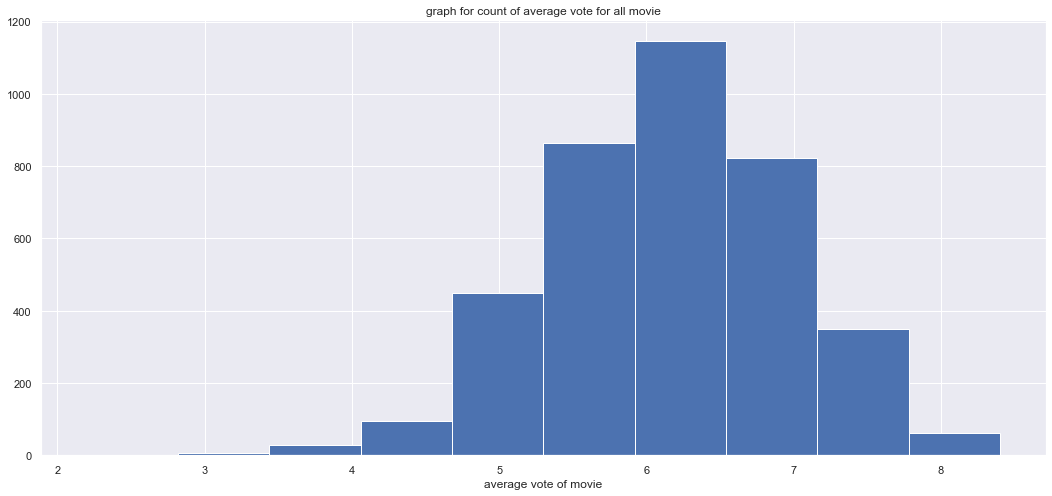

In [473]:
plt.figure(figsize=(18,8))
plt.hist(df_1['vote_average'])
plt.xlabel('average vote of movie')
plt.title('graph for count of average vote for all movie')

>the graph shows most movie has average_rating within 5-7

## Research Question 6  (TOTAL AND AVERAGE REVENUE OF EACH GENRES!)
>most  movies in the datasets are classified into many gernes, so getting the REVENUE for each GENRE may be somehow tricky, the cell takes each **row(movie) with with genres(WHERE MOST HAVE 1-5 GENRE)**, split it  to get list and add each unique gerne to the top_genres list. three empty lists are created which after iteration in the for loop, each unique gerne is added wIth the revenue of the groups it belong are are added and store to total_revnue list, the genres_count shows the amounts of time each counts occurs which will be used to get the average revenue of each genres

In [474]:

def gerne_rev_budget( col1, col2, out_col_name1, out_col_name2, out_col_name3):
    top_genres = []
    total_budget = []
    genres_counts = []
    for genre, budget in zip(col1, col2):
        genres = genre.split("|")
        for i in genres:
            if i not in top_genres:
                top_genres.append(i)
                total_budget.append(budget)
                genres_counts.append(1)
            else:
                genres_index =  top_genres.index(i)
                genres_counts[genres_index] += 1
                total_budget[genres_index] += budget
    df = pd.DataFrame({out_col_name1: top_genres, 'counts': genres_counts, out_col_name2: total_budget})
    df[out_col_name3] = df[out_col_name2]/df['counts']
    df.sort_values(out_col_name3, ascending = False, inplace = True)
    return df
df_total_budget = gerne_rev_budget(df_1['genres'], df_1['budget_adj'], 'genre', 'total_budget', 'average_budget').sort_values('average_budget', ascending = False)
#plt.bar(movie_revenue.keys(), movie_revenue.values())

In [475]:
df_total_budget

,genre,counts,total_budget,average_budget
9,Animation,199,1.665937e+10,8.371541e+07
1,Adventure,743,6.070177e+10,8.169821e+07
4,Fantasy,391,3.156358e+10,8.072527e+07
8,Family,420,2.996742e+10,7.135099e+07
6,Western,52,3.493935e+09,6.719107e+07
0,Action,1077,7.208002e+10,6.692666e+07
2,Science Fiction,517,3.404511e+10,6.585128e+07
13,War,119,6.815481e+09,5.727295e+07
14,History,128,7.330388e+09,5.726866e+07
3,Thriller,1195,5.370262e+10,4.493943e+07


Text(0.5, 1.0, 'graph of average budget of various genres')

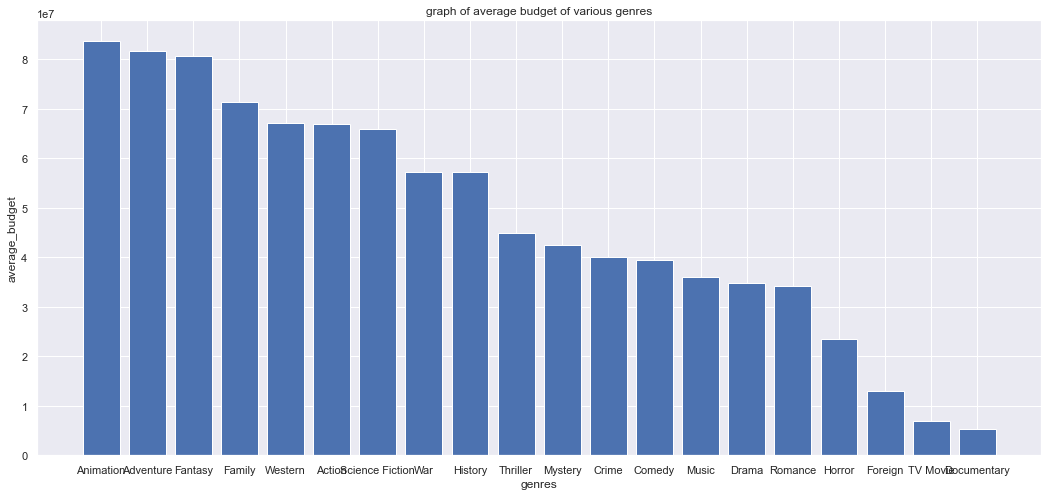

In [476]:
plt.figure(figsize=(18,8))
plt.bar(df_total_budget['genre'], df_total_budget['average_budget'])
plt.xlabel('genres')
plt.ylabel('average_budget')
plt.title('graph of average budget of various genres')

Text(0.5, 1.0, 'graph of total_budget of various genres')

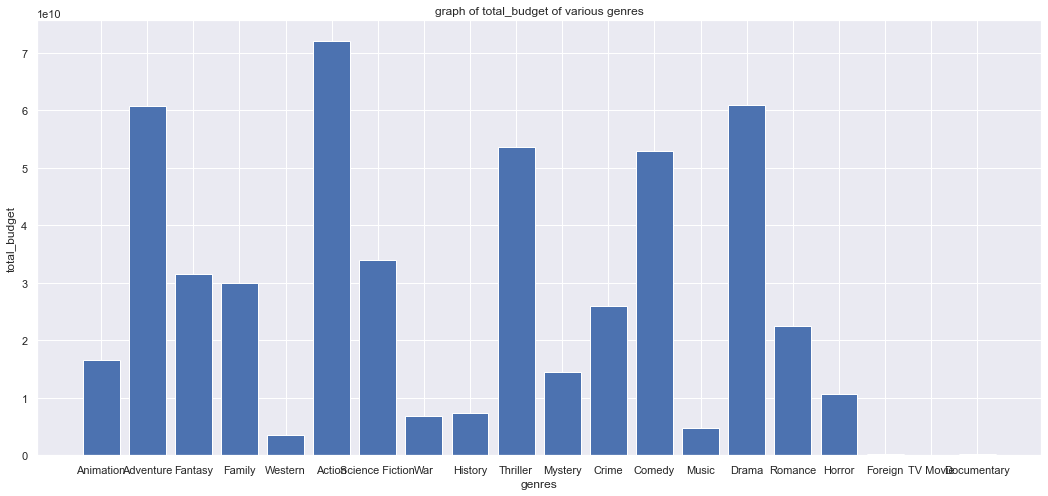

In [477]:
plt.figure(figsize=(18,8))
plt.bar(df_total_budget['genre'], df_total_budget['total_budget'])
plt.xlabel('genres')
plt.ylabel('total_budget')
plt.title('graph of total_budget of various genres')

> the 2 graphs above shows that action followed by  drama and  adventure  movies gets the most total_budget for gernes, while Adventure followed by Fantasy and Animation gets the most average_budget per movie

In [478]:
df_total_revenue = gerne_rev_budget(df_1['genres'], df_1['revenue_adj'], 'genre', 'total_revenue', 'average_revenue'  ).sort_values('counts', ascending = False)
df_total_revenue

,genre,counts,total_revenue,average_revenue
7,Drama,1745,1.777766e+11,1.018777e+08
10,Comedy,1340,1.647210e+11,1.229261e+08
3,Thriller,1195,1.543051e+11,1.291256e+08
0,Action,1077,2.117679e+11,1.966276e+08
1,Adventure,743,2.030552e+11,2.732910e+08
12,Romance,657,7.548632e+10,1.148955e+08
5,Crime,650,7.186820e+10,1.105665e+08
2,Science Fiction,517,1.049184e+11,2.029370e+08
16,Horror,458,3.769123e+10,8.229527e+07
8,Family,420,1.033822e+11,2.461481e+08


In [479]:
df_total_revenue

,genre,counts,total_revenue,average_revenue
7,Drama,1745,1.777766e+11,1.018777e+08
10,Comedy,1340,1.647210e+11,1.229261e+08
3,Thriller,1195,1.543051e+11,1.291256e+08
0,Action,1077,2.117679e+11,1.966276e+08
1,Adventure,743,2.030552e+11,2.732910e+08
12,Romance,657,7.548632e+10,1.148955e+08
5,Crime,650,7.186820e+10,1.105665e+08
2,Science Fiction,517,1.049184e+11,2.029370e+08
16,Horror,458,3.769123e+10,8.229527e+07
8,Family,420,1.033822e+11,2.461481e+08


<a id='graph of average revenue of various genres'></a>

Text(0.5, 1.0, 'graph of average revenue of various genres')

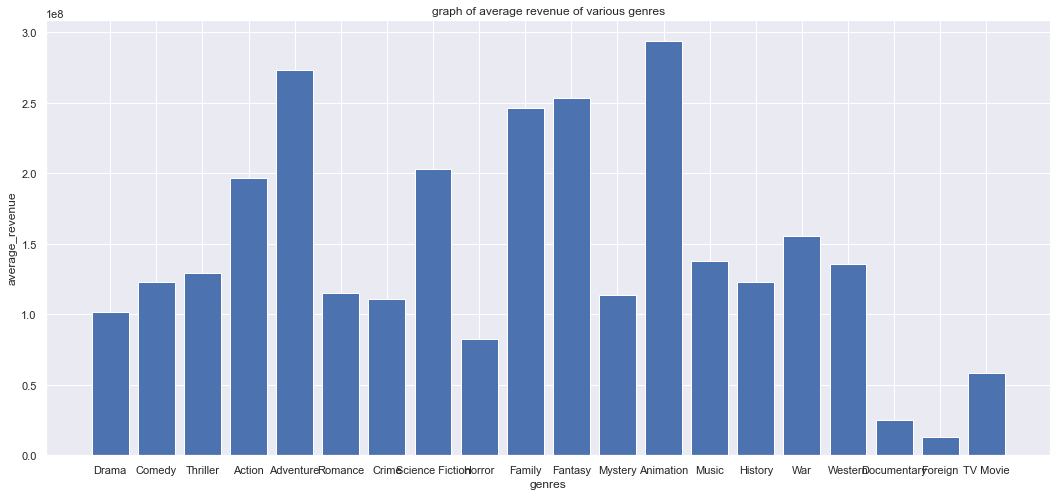

In [480]:
plt.figure(figsize=(18,8))
plt.bar(df_total_revenue['genre'], df_total_revenue['average_revenue'])
plt.xlabel('genres')
plt.ylabel('average_revenue')
plt.title('graph of average revenue of various genres')

<a id='graph of total revenue of various genres'></a>

Text(0.5, 1.0, 'graph of total revenue of various genres')

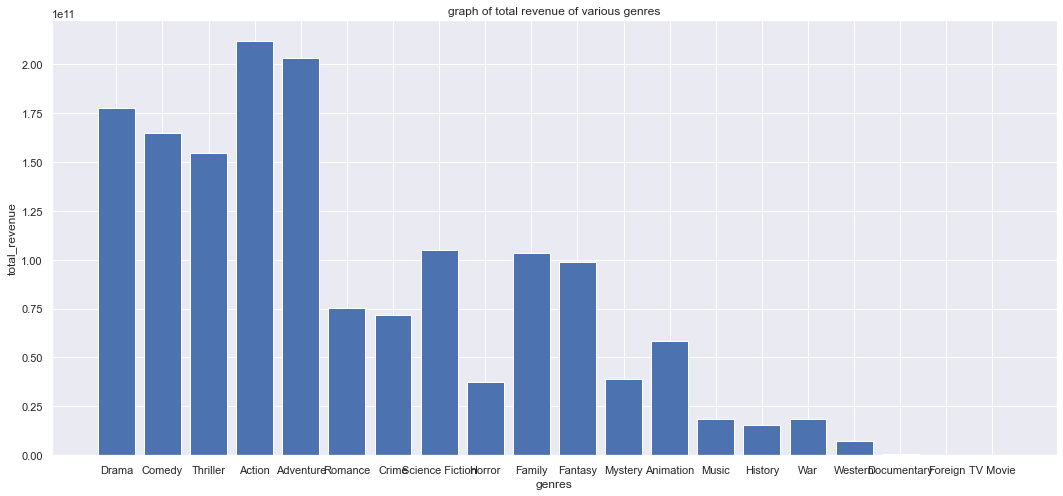

In [481]:
plt.figure(figsize=(18,8))
plt.bar(df_total_revenue['genre'], df_total_revenue['total_revenue'])
plt.xlabel('genres')
plt.ylabel('total_revenue')
plt.title('graph of total revenue of various genres')

In [482]:
df_revenue_budget = pd.concat([df_total_budget, df_total_revenue[['total_revenue', 'average_revenue']]],  axis = 1)
df_revenue_budget['profit_in_%'] = round(((df_revenue_budget['average_revenue'] - df_revenue_budget['average_budget']) / df_revenue_budget['average_budget']) * 100, 2 )
df_revenue_budget

,genre,counts,total_budget,average_budget,total_revenue,average_revenue,profit_in_%
0,Action,1077,7.208002e+10,6.692666e+07,2.117679e+11,1.966276e+08,193.80
1,Adventure,743,6.070177e+10,8.169821e+07,2.030552e+11,2.732910e+08,234.51
2,Science Fiction,517,3.404511e+10,6.585128e+07,1.049184e+11,2.029370e+08,208.17
3,Thriller,1195,5.370262e+10,4.493943e+07,1.543051e+11,1.291256e+08,187.33
4,Fantasy,391,3.156358e+10,8.072527e+07,9.899713e+10,2.531896e+08,213.64
5,Crime,650,2.601145e+10,4.001762e+07,7.186820e+10,1.105665e+08,176.29
6,Western,52,3.493935e+09,6.719107e+07,7.055088e+09,1.356748e+08,101.92
7,Drama,1745,6.093077e+10,3.491735e+07,1.777766e+11,1.018777e+08,191.77
8,Family,420,2.996742e+10,7.135099e+07,1.033822e+11,2.461481e+08,244.98
9,Animation,199,1.665937e+10,8.371541e+07,5.848243e+10,2.938816e+08,251.05


<a id='graph of profit_in_% of various genres'></a>

Text(0.5, 1.0, 'graph of profit_in_% of various genres')

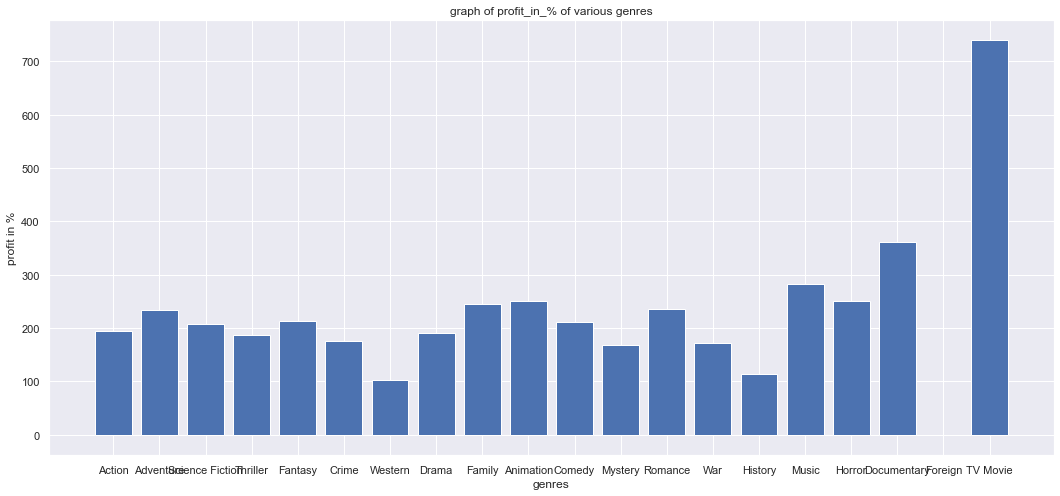

In [483]:
plt.figure(figsize=(18,8))
plt.bar(df_revenue_budget['genre'], df_revenue_budget['profit_in_%'])
plt.xlabel('genres')
plt.ylabel('profit in %')
plt.title('graph of profit_in_% of various genres')

<a id='graph of profit_in_% of various genres with at least 50 movies'></a>

Text(0.5, 1.0, 'graph of profit_in_% of various genres with at least 50 movies')

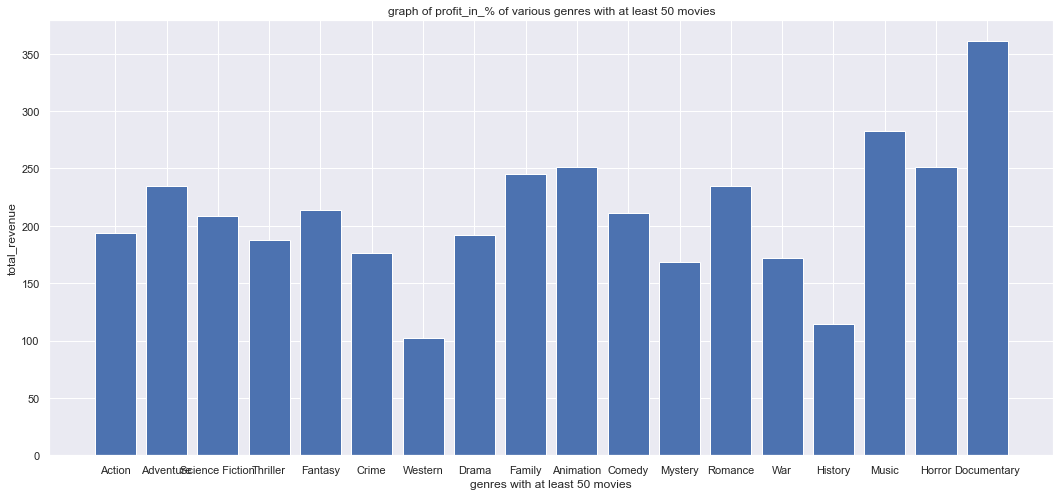

In [484]:
plt.figure(figsize=(18,8))
plt.bar(df_revenue_budget[df_revenue_budget['counts']>20]['genre'], df_revenue_budget[df_revenue_budget['counts']>20]['profit_in_%'])
plt.xlabel('genres with at least 50 movies')
plt.ylabel('total_revenue')
plt.title('graph of profit_in_% of various genres with at least 50 movies')

### GERNE vs TOTAL REVENUE and PROFIT_%
> The <a href="#graph of average revenue of various genres">bar graph</a> shows that movie which are **animations** tends to generate more revenue with 293881600 on average followed by **Adventure** 273291000 average revenue and **Fantasy** 253189600 revenue average , But the gerne which has the most total revenue according to <a href="#graph of total revenue of various genres">this bar graph</a> is of **action** which has total revenue of 211767900000  followed by **adventure** with 203055200000 total revenue and **drama** with 177776600000 while   movie which are **foreign, documentary and tv_movie shows** to be the least interms of total revenue and average_revenue per movie

>the <a href="#graph of profit_in_% of various genres">barchat</a> shows that **tv_movies** has the most profit%, it has 740%, this may be  confusing because the gerne has only one movie, **Documentary** movies makes profit of 361.12% on average, **music movies** makes profit of 282.31% on average followed by **horror** 250.26%, **Animation movies** which averages 248.57%.    **Foreign movies** shows to have a loss of -1.78% on average
graph of profit_in_% of various genres

 <ul>
<li> TV Movie	    740.00  </li>
<li> Documentary	361.12 <br> </li>
<li>music           282.31 <br> </li>
<li>Horror	        250.26 <br> </li>
<li>Animation	    248.57 <br> </li>
<li>Family	        242.88 <br> </li>
<li>Romance	        234.82 <br> </li>
<li>Adventure	    234.01 <br> </li>
<li>Fantasy	        211.57 <br> </li>
<li>Comedy	        209.65 <br> </li>
<li>Science Fiction	207.81 <br> </li>
<li>Action	        193.95 <br> </li>
<li>Drama           191.91 <br> </li>
<li>Thriller	    187.21 <br> </li>
<li>Crime	        176.29 <br> </li>
<li>War	            172.20 <br> </li>
<li>Mystery	        168.21 <br> </li>
<li>History	        113.89 <br> </li>
<li>Western	        101.92 <br> </li>
<li>Foreign	        -1.28  <br> </li>
  </ul>
      
> for gernes with at least 50 movies,  this <a href="#graph of profit_in_% of various genres with at least 50 movies">bar chat</a> shows music which has 133 movies tops with profit% with 283.33% followed by Horror with 458 movies with 251.1%, Animation with 199 movies with 251.05%, Family with movies having profit of 244.98 and Romance with 657 movies having profit of 235.02%. which made the top 5 gerne with atleast 50 movies with the most profits%. 


In [485]:
df_revenue_budget[df_revenue_budget['counts']>=50].sort_values(by= 'total_revenue', ascending = False )

,genre,counts,total_budget,average_budget,total_revenue,average_revenue,profit_in_%
0,Action,1077,7.208002e+10,6.692666e+07,2.117679e+11,1.966276e+08,193.80
1,Adventure,743,6.070177e+10,8.169821e+07,2.030552e+11,2.732910e+08,234.51
7,Drama,1745,6.093077e+10,3.491735e+07,1.777766e+11,1.018777e+08,191.77
10,Comedy,1340,5.300401e+10,3.955523e+07,1.647210e+11,1.229261e+08,210.77
3,Thriller,1195,5.370262e+10,4.493943e+07,1.543051e+11,1.291256e+08,187.33
2,Science Fiction,517,3.404511e+10,6.585128e+07,1.049184e+11,2.029370e+08,208.17
8,Family,420,2.996742e+10,7.135099e+07,1.033822e+11,2.461481e+08,244.98
4,Fantasy,391,3.156358e+10,8.072527e+07,9.899713e+10,2.531896e+08,213.64
12,Romance,657,2.253214e+10,3.429549e+07,7.548632e+10,1.148955e+08,235.02
5,Crime,650,2.601145e+10,4.001762e+07,7.186820e+10,1.105665e+08,176.29


## Research Question 7 (director and revenue/profit_loss%)

>some directors directed many movies, so to get their revenue and profit, a function is created which add each unique director to the directors list, its revenue is added to total_revenue list which is then inreased when then director appears again and the director count is also incremented.

In [486]:
def director_rev_budget(col1, col2, out_colname1, out_colname2, out_colname3):
    directors = []
    total_revenue = []
    director_counts = []


    for director, revenue in zip(col1, col2):
            if director not in directors:
                directors.append(director)
                total_revenue.append(revenue)
                director_counts.append(1)
            else:
                director_index =  directors.index(director)
                director_counts[director_index] += 1
                total_revenue[director_index] += revenue


    df = pd.DataFrame({out_colname1: directors, 'counts': director_counts, out_colname2: total_revenue})
    df[out_colname3] = df[out_colname2]/df['counts']
    return df

In [487]:
df_director_revenue = director_rev_budget(df_1['director'], df_1['revenue_adj'], 'director', 'total_revenue', 'average_revenue')
df_director_revenue.sort_values('total_revenue', ascending = False, inplace = True)

In [488]:
df_director_revenue.sort_values('total_revenue', ascending = False, inplace = True)
df_director_revenue.head(20)

,director,counts,total_revenue,average_revenue
32,Steven Spielberg,27,1.520245e+10,5.630536e+08
320,James Cameron,8,7.327221e+09,9.159026e+08
163,Peter Jackson,11,7.019848e+09,6.381680e+08
305,George Lucas,6,6.313919e+09,1.052320e+09
76,Robert Zemeckis,15,5.655648e+09,3.770432e+08
175,Michael Bay,11,5.460672e+09,4.964247e+08
13,Chris Columbus,9,4.893486e+09,5.437206e+08
238,Tim Burton,16,4.529285e+09,2.830803e+08
322,David Yates,4,4.177455e+09,1.044364e+09
159,Christopher Nolan,8,4.164262e+09,5.205327e+08


In [489]:
df_director_revenue.head(20)

,director,counts,total_revenue,average_revenue
32,Steven Spielberg,27,1.520245e+10,5.630536e+08
320,James Cameron,8,7.327221e+09,9.159026e+08
163,Peter Jackson,11,7.019848e+09,6.381680e+08
305,George Lucas,6,6.313919e+09,1.052320e+09
76,Robert Zemeckis,15,5.655648e+09,3.770432e+08
175,Michael Bay,11,5.460672e+09,4.964247e+08
13,Chris Columbus,9,4.893486e+09,5.437206e+08
238,Tim Burton,16,4.529285e+09,2.830803e+08
322,David Yates,4,4.177455e+09,1.044364e+09
159,Christopher Nolan,8,4.164262e+09,5.205327e+08


In [490]:
df.director.value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

>the director_rev_budget function created above can also work for the revenue, so its been use dbelow, 

In [491]:
df_director_budget = director_rev_budget(df_1['director'], df_1['budget_adj'], 'director', 'total_budget', 'average_budget' )

In [492]:
df_director_budget_revenue = pd.concat([df_director_budget, df_director_revenue[[ 'total_revenue', 'average_revenue']]], axis = 1)
df_director_budget_revenue['profit_in_%'] = round(((df_director_budget_revenue['total_revenue'] - df_director_budget_revenue['total_budget'])/ df_director_budget_revenue['total_budget']) * 100, 2)
df_director_budget_revenue.sort_values('profit_in_%', ascending = False, inplace = True)

In [493]:

print('Directors who made a loss')
df_director_budget_revenue[df_director_budget_revenue['profit_in_%']<0].sort_values('profit_in_%', ascending = True)

Directors who made a loss


,director,counts,total_budget,average_budget,total_revenue,average_revenue,profit_in_%
1374,Gillian Armstrong,1,2.103337e+07,2.103337e+07,3.744992e+03,3.744992e+03,-99.98
1001,David Weaver,1,1.139693e+07,1.139693e+07,2.394305e+03,2.394305e+03,-99.98
1121,Jonathan Newman,1,2.340083e+07,2.340083e+07,5.989677e+03,5.989677e+03,-99.97
1185,Tony Giglio,1,1.339876e+07,1.339876e+07,1.148832e+04,1.148832e+04,-99.91
1134,Logan Miller,1,6.552233e+06,6.552233e+06,5.753797e+03,5.753797e+03,-99.91
...,...,...,...,...,...,...,...
929,Steven Seagal,1,7.355558e+07,7.355558e+07,7.208447e+07,7.208447e+07,-2.00
1198,Danny Cannon,3,2.492341e+08,8.307804e+07,2.467453e+08,8.224845e+07,-1.00
1662,Robert Lieberman,1,3.001664e+07,3.001664e+07,2.977329e+07,2.977329e+07,-0.81
910,Paul Schrader,6,7.320431e+07,1.220072e+07,7.263266e+07,1.210544e+07,-0.78


In [494]:
top_directors = df_director_budget_revenue[df_director_budget_revenue['counts']>=3].head(15)
low_directors = df_director_budget_revenue[df_director_budget_revenue['counts']>=3].tail(15)

<a id='percentage of profit of top 20 directors with at least 3 movies'></a>

Text(0.5, 1.0, 'percentage of profit of top 20 directors with at least 3 movies ')

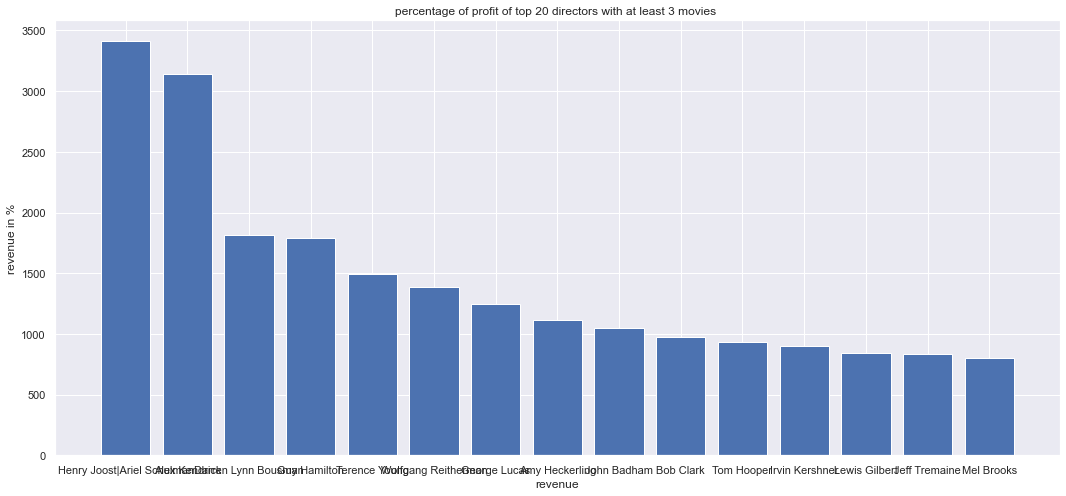

In [495]:

plt.figure(figsize=(18,8))
plt.bar(top_directors['director'], top_directors['profit_in_%'])
plt.xlabel('revenue')
plt.ylabel('revenue in %')
plt.title('percentage of profit of top 20 directors with at least 3 movies ')

<a id='directors with the most loss  with at least 3 movies'></a>

Text(0.5, 1.0, 'directors with the most loss  with at least 3 movies')

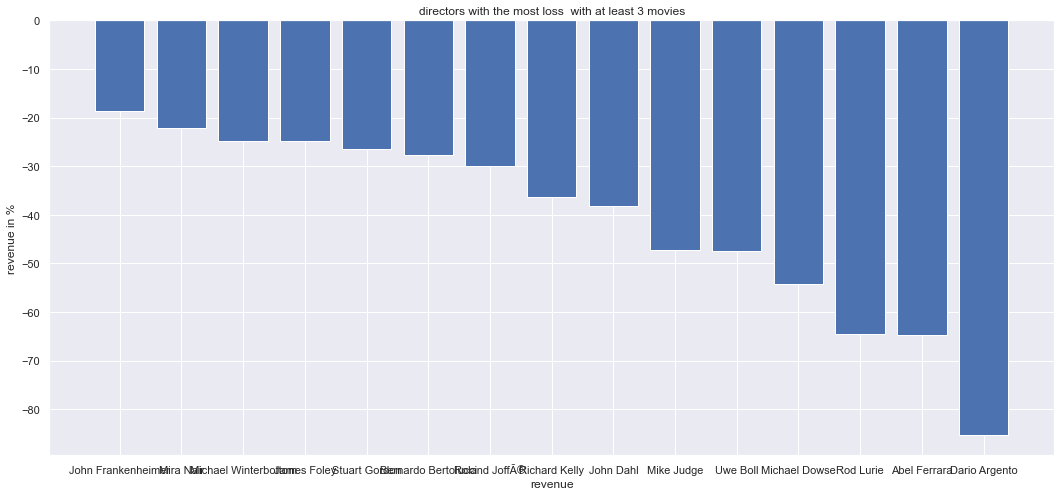

In [496]:
plt.figure(figsize=(18,8))
plt.bar(low_directors['director'], low_directors['profit_in_%'])
plt.xlabel('revenue')
plt.ylabel('revenue in %')
plt.title('directors with the most loss  with at least 3 movies')

In [497]:
#gets the top 20 director with at least 5 movies with most profit
top_directors_1 = df_director_budget_revenue[df_director_budget_revenue['counts']>=5].head(15)
# gets the directors with the most loss who has at least 5 movies(just 5 directors is available 
#thats why the last 5 director is selected, since the df_director_budget_revenue is been sorted in descending order )
low_directors_1 = df_director_budget_revenue[df_director_budget_revenue['counts']>=5].tail(5)

<a id='percentage of profit of top 20 directors with at least 5 movies'></a>

Text(0.5, 1.0, 'percentage of profit of top 20 directors with at least 5 movies ')

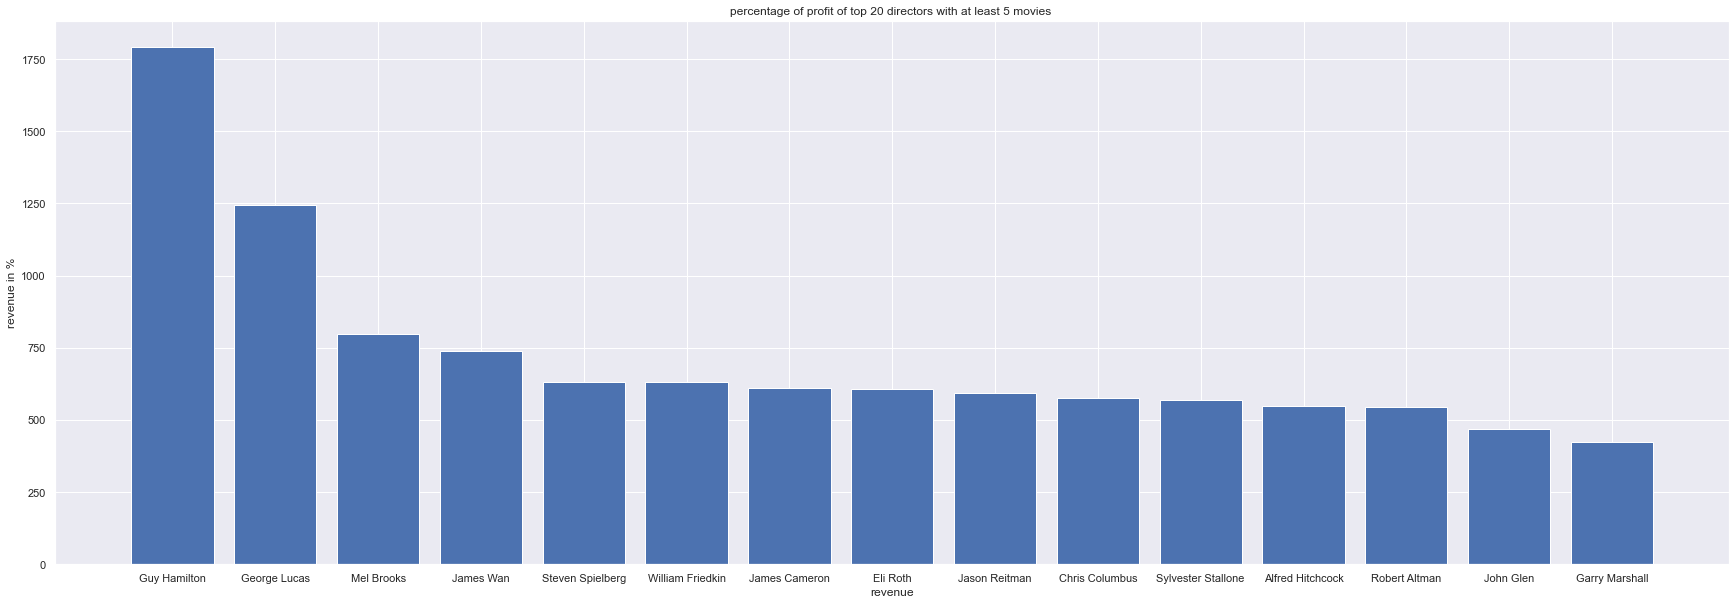

In [498]:

plt.bar(top_directors_1['director'], top_directors_1['profit_in_%'])
plt.xlabel('revenue')
plt.ylabel('revenue in %')
plt.title('percentage of profit of top 20 directors with at least 5 movies ')

<a id='least percentage of profit of  directors  with at least 5 movies'></a>

Text(0.5, 1.0, 'least percentage of profit of  directors  with at least 5 movies')

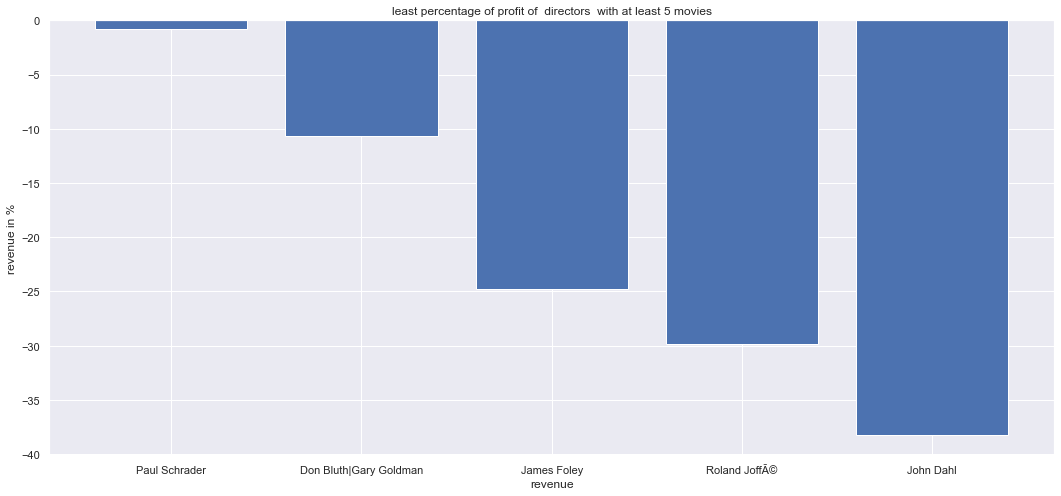

In [499]:
plt.figure(figsize=(18,8))
plt.bar(low_directors_1['director'], low_directors_1['profit_in_%'])
plt.xlabel('revenue')
plt.ylabel('revenue in %')
plt.title('least percentage of profit of  directors  with at least 5 movies')

In [500]:
df_director_budget_revenue['profit_loss'] = df_director_budget_revenue['total_revenue'] - df_director_budget_revenue['total_budget']
df_director_budget_revenue['average_profit_loss'] = df_director_budget_revenue['profit_loss'] / df_director_budget_revenue['counts']

In [501]:
df_director_most_profit = df_director_budget_revenue.sort_values(by = 'profit_loss', ascending = False).head(20)
df_director_most_loss = df_director_budget_revenue.sort_values(by = 'profit_loss', ascending = False).tail(15)
df_director_most_loss

,director,counts,total_budget,average_budget,total_revenue,average_revenue,profit_in_%,profit_loss,average_profit_loss
648,Hironobu Sakaguchi|Motonori Sakakibara,1,1.687139e+08,1.687139e+08,1.048388e+08,1.048388e+08,-37.86,-6.387503e+07,-6.387503e+07
592,Adam Rifkin,2,8.275670e+07,4.137835e+07,1.730304e+07,8.651521e+06,-79.09,-6.545365e+07,-3.272683e+07
1230,Steven Zaillian,2,1.531305e+08,7.656524e+07,8.607396e+07,4.303698e+07,-43.79,-6.705653e+07,-3.352826e+07
1537,Mikael Salomon,1,9.363868e+07,9.363868e+07,2.658077e+07,2.658077e+07,-71.61,-6.705792e+07,-6.705792e+07
1359,Oliver Hirschbiegel|James McTeigue,1,8.413349e+07,8.413349e+07,1.585024e+07,1.585024e+07,-81.16,-6.828325e+07,-6.828325e+07
609,Rand Ravich,1,9.817896e+07,9.817896e+07,2.565559e+07,2.565559e+07,-73.87,-7.252338e+07,-7.252338e+07
1348,Joby Harold,1,9.044350e+07,9.044350e+07,1.511650e+07,1.511650e+07,-83.29,-7.532700e+07,-7.532700e+07
510,Andrei Konchalovsky,2,1.082445e+08,5.412225e+07,3.226657e+07,1.613329e+07,-70.19,-7.597792e+07,-3.798896e+07
1564,Michael Lehmann,1,1.040710e+08,1.040710e+08,2.756774e+07,2.756774e+07,-73.51,-7.650329e+07,-7.650329e+07
606,Hugh Johnson,1,9.163370e+07,9.163370e+07,1.474513e+07,1.474513e+07,-83.91,-7.688857e+07,-7.688857e+07


<a id='total_profits made by each director'></a>

Text(0.5, 1.0, 'total_profits made by each director')

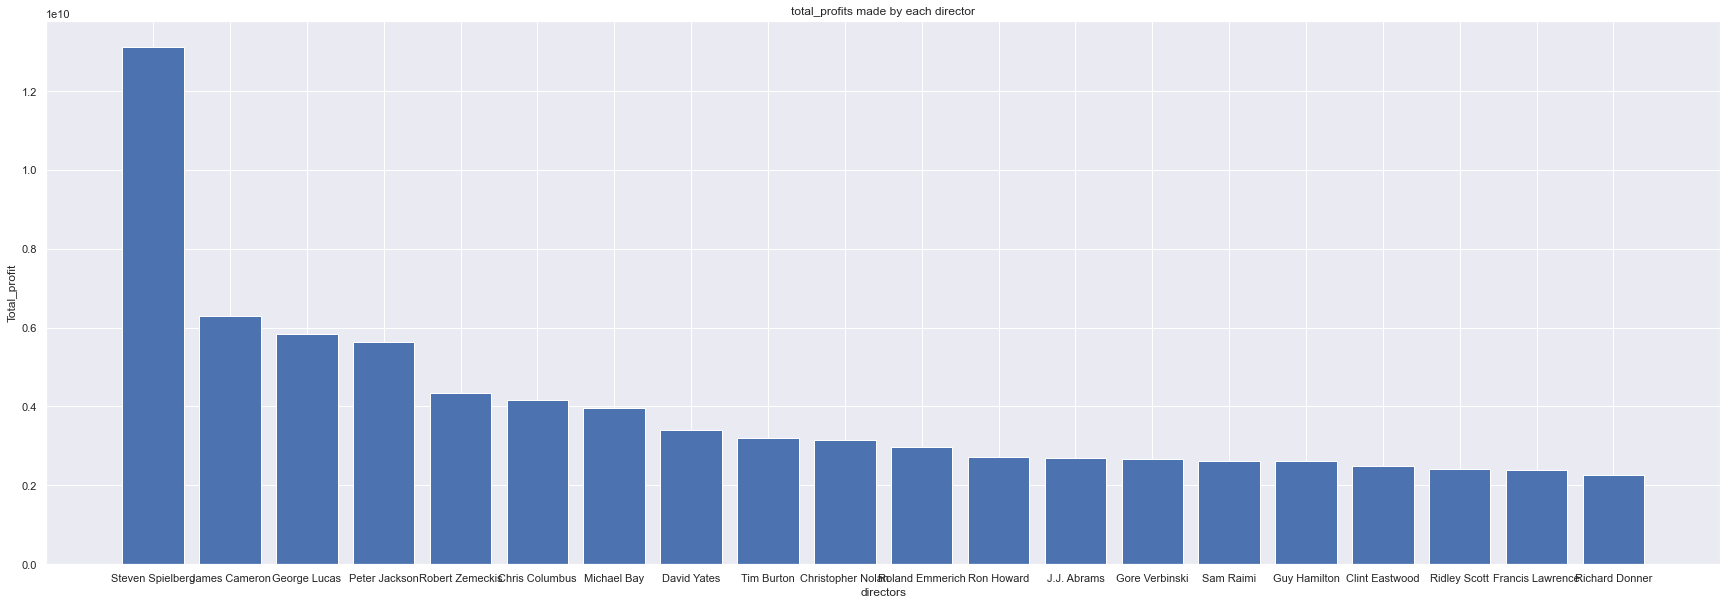

In [502]:
plt.bar(df_director_most_profit['director'], df_director_most_profit['profit_loss'])
plt.xlabel('directors')
plt.ylabel('Total_profit')
plt.title('total_profits made by each director')

<a id='director with most total_loss'></a>

Text(0.5, 1.0, 'director with most total_loss ')

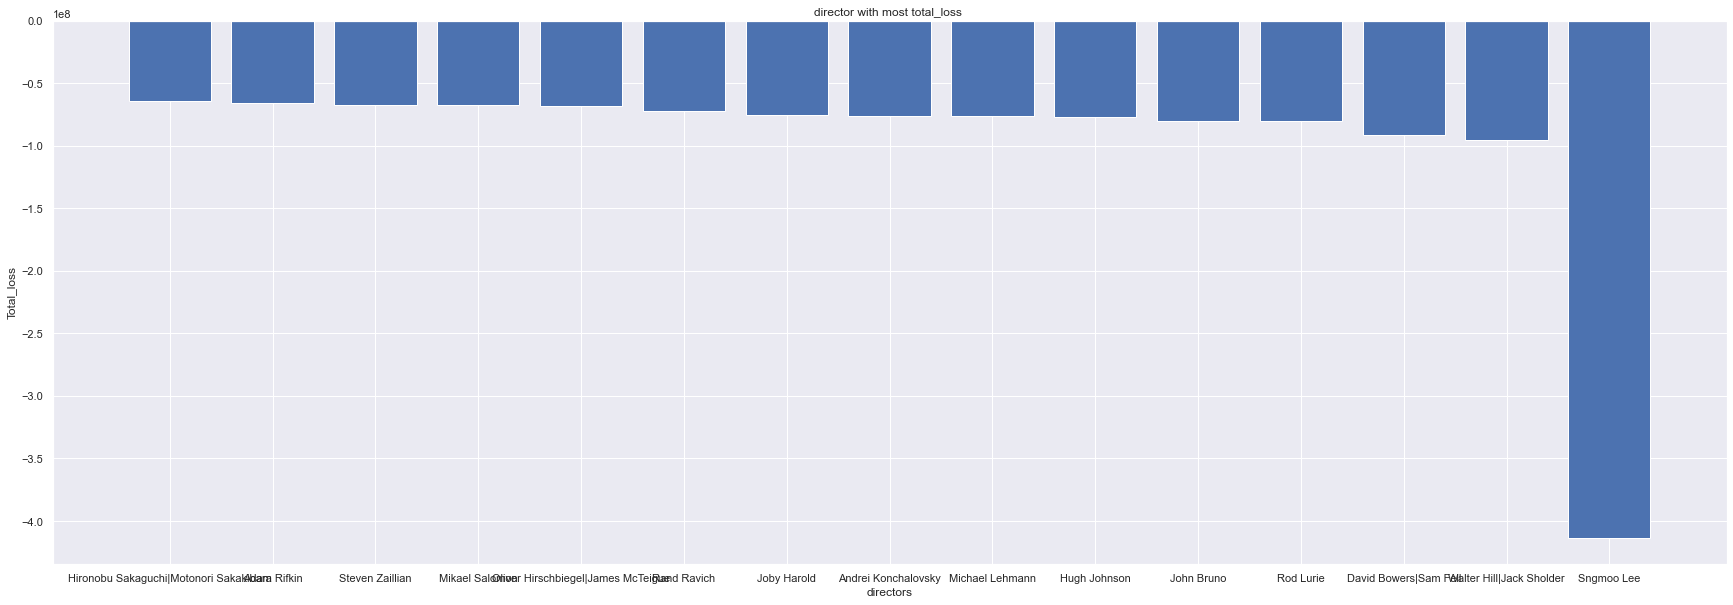

In [503]:
plt.bar(df_director_most_loss['director'], df_director_most_loss['profit_loss'])
plt.xlabel('directors')
plt.ylabel('Total_loss')
plt.title('director with most total_loss ')

In [504]:
df_director_most_loss.sort_values(by = 'profit_in_%', ascending = True).head(20)

,director,counts,total_budget,average_budget,total_revenue,average_revenue,profit_in_%,profit_loss,average_profit_loss
554,Sngmoo Lee,1,4.250000e+08,4.250000e+08,1.108757e+07,1.108757e+07,-97.39,-4.139124e+08,-4.139124e+08
606,Hugh Johnson,1,9.163370e+07,9.163370e+07,1.474513e+07,1.474513e+07,-83.91,-7.688857e+07,-7.688857e+07
1499,Walter Hill|Jack Sholder,1,1.139663e+08,1.139663e+08,1.877668e+07,1.877668e+07,-83.52,-9.518961e+07,-9.518961e+07
1348,Joby Harold,1,9.044350e+07,9.044350e+07,1.511650e+07,1.511650e+07,-83.29,-7.532700e+07,-7.532700e+07
589,John Bruno,1,9.817896e+07,9.817896e+07,1.834073e+07,1.834073e+07,-81.32,-7.983823e+07,-7.983823e+07
1359,Oliver Hirschbiegel|James McTeigue,1,8.413349e+07,8.413349e+07,1.585024e+07,1.585024e+07,-81.16,-6.828325e+07,-6.828325e+07
592,Adam Rifkin,2,8.275670e+07,4.137835e+07,1.730304e+07,8.651521e+06,-79.09,-6.545365e+07,-3.272683e+07
609,Rand Ravich,1,9.817896e+07,9.817896e+07,2.565559e+07,2.565559e+07,-73.87,-7.252338e+07,-7.252338e+07
1564,Michael Lehmann,1,1.040710e+08,1.040710e+08,2.756774e+07,2.756774e+07,-73.51,-7.650329e+07,-7.650329e+07
1537,Mikael Salomon,1,9.363868e+07,9.363868e+07,2.658077e+07,2.658077e+07,-71.61,-6.705792e+07,-6.705792e+07


In [505]:
df_director_most_revenue = df_director_budget_revenue.sort_values(by = 'total_revenue', ascending = False).head(20)

<a id='director and total revenue of movie they directed'></a>

Text(0.5, 1.0, 'director and total revenue of movie they directed')

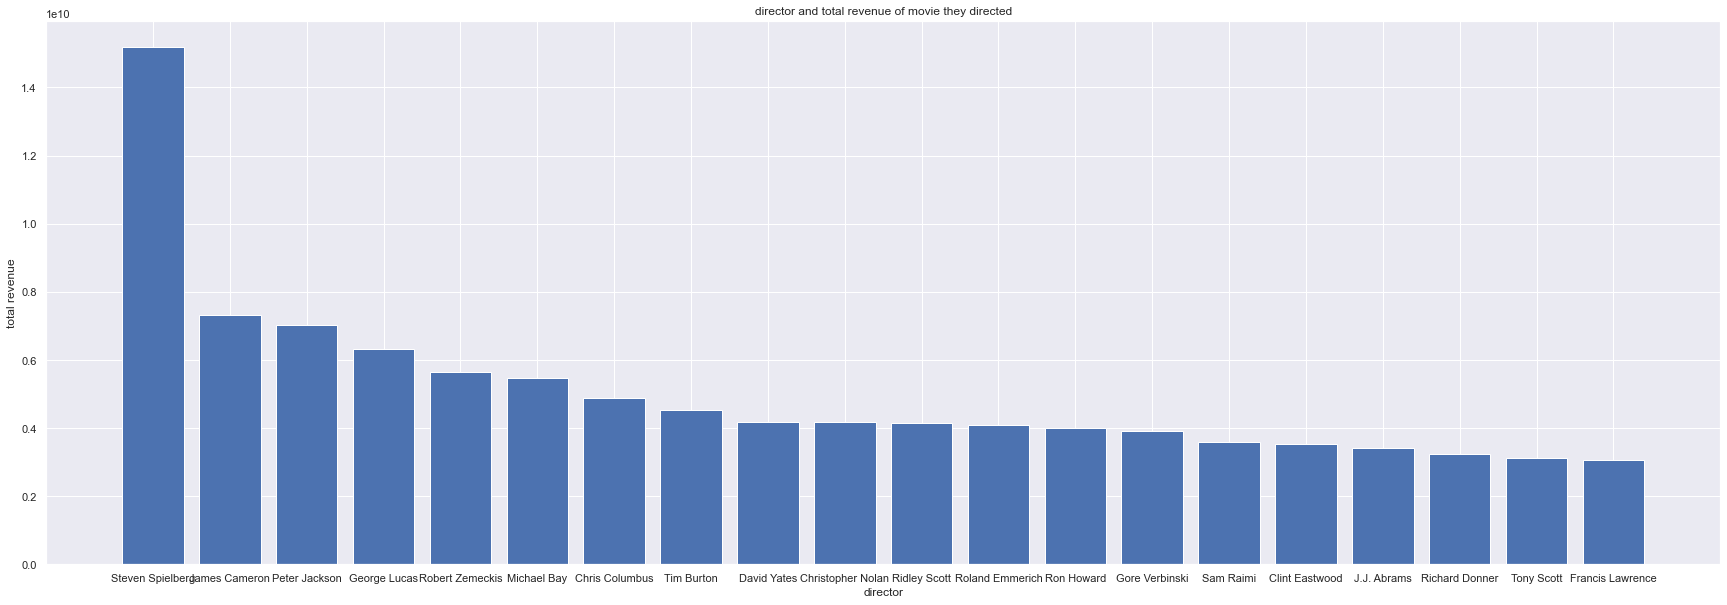

In [506]:
plt.bar(df_director_most_revenue['director'], df_director_most_revenue['total_revenue'])
plt.xlabel('director')
plt.ylabel('total revenue')
plt.title('director and total revenue of movie they directed')

### DIRECTORS AND REVENUE/PROFIT/LOSS

> the <a href="#percentage of profit of top 20 directors with at least 3 movies">barchat</a> above shows the percentage of profit/loss each movie directors makeS, this can help in knowing which director movie to invest in **Henry Joost and Ariel Schulman** tops with an average of 3412.42% profit per movie, followeed by **Alex Kendrick** 3139.59%, **Darren Lynn Bousman** 1816.94%, **GUY HAMILTON** 1793% and **Terence Young** with 1494.07% <br> while <a href="#directors with the most loss  with at least 3 movies">this barchat</a> shows for directors with at least 3 movies **[Danny Cannon','Luis Mandoki','Richard Fleischer','Lana Wachowski|Lilly Wachowski','Don Bluth|Gary Goldman','John Frankenheimer','Mira Nair', 'Michael Winterbottom','James Foley','Stuart Gordon','Bernardo Bertolucci','Roland JoffÃ©','Richard Kelly','John Dahl','Mike Judge','Uwe Boll','Michael Dowse','Rod Lurie','Abel Ferrara','Dario Argento']** all made a loss. With  **'Dario Argento'** having -85.23% loss, **'Abel Ferrara'** -64.77% loss, **'Rod Lurie'** -64.48% loss, **'Michael Dowse'** -54.23% loss and **'Uwe Boll'** -47.17 loss who are  5 director(with at least 3 movie)  who has the top 5 loss%.

> <a href="#percentage of profit of top 20 directors with at least 5 movies">this barchat</a> shows director with at least 5 movies **GUY HAMILTON** tops with an average of 1793% profit per movie, followeed by **George lucas** 1244%, **MEL BROOKS** 789.97%, **JAMES WAN** 737.18% and **Steven Spielberg** with 632.15% <br>
where as in <a href="#least percentage of profit of  directors  with at least 5 movies">in this_chart</a> 5 directors[directors who have directed atleast 5 movies] appears to direct movie which runs at loss. The top losser is **JOHN DAHL** who made a loss of -38.19%, **ROLAND JOJoffÃ©** -29.87%, **JAMES FOLEY** -24.76%, **Don Bluth and Gary Goldman** -10.69%, **paul schrader** -0.78%.


> <a href="#total_profits made by each director">in this chart</a>**Steven Spielberg** appears to make the most total_profit also with 13126030000 total profits, followed by **james cameron** who makes 6296578000 and **george lucas** 5844159000. whereas <a href="#director with most total_loss">in this</a> **Sngmoo Lee** appears to have the most loss of -413912400 followed by **David Bowers andSam Fell** who had -95189610 then **Walter Hill and Jack Sholder** who had loss of -91445050.<br>
for directors with at least 3 movies **Rod Lurie** has an average loss of -26769960 while **Roland JoffÃ©** has an average loss of 12564490

> For Total Revenue <a href="#director and total revenue of movie they directed">this_chart</a> shows , **Steven Spielberg** tops with 15202450000 followed by **james Cameron** with 732722100,  **Peter Jackson** 701984800, **George Lucas** 5844159000 and **Robert Zemeckis** 377043200 who all are the top 5 directors with most revenue

In [507]:
low_directors

,director,counts,total_budget,average_budget,total_revenue,average_revenue,profit_in_%
1495,John Frankenheimer,3,1.458599e+08,4.861997e+07,1.187442e+08,3.958140e+07,-18.59
429,Mira Nair,4,8.435894e+07,2.108974e+07,6.568456e+07,1.642114e+07,-22.14
1293,Michael Winterbottom,3,2.771266e+07,9.237553e+06,2.085359e+07,6.951195e+06,-24.75
604,James Foley,5,1.985298e+08,3.970596e+07,1.493798e+08,2.987595e+07,-24.76
1165,Stuart Gordon,3,2.320897e+07,7.736324e+06,1.708323e+07,5.694409e+06,-26.39
1016,Bernardo Bertolucci,4,1.564731e+08,3.911826e+07,1.131295e+08,2.828238e+07,-27.70
1370,Roland JoffÃ©,5,2.103520e+08,4.207041e+07,1.475296e+08,2.950592e+07,-29.87
337,Richard Kelly,3,5.626932e+07,1.875644e+07,3.585020e+07,1.195007e+07,-36.29
660,John Dahl,5,1.499841e+08,2.999681e+07,9.271046e+07,1.854209e+07,-38.19
411,Mike Judge,3,5.367181e+07,1.789060e+07,2.835475e+07,9.451582e+06,-47.17


## Research Question 8 (casts and revenue/profit_loss%)

>since each movie has more than of cast, the code bellow add the revenue of each movies each casts appeard in, and sum it to gether to get the total revenue of the movies they appeared in, the cast-count holds the number of time each casts appeared 

In [508]:
all_casts = []
total_revenue = []
cast_count = []


for casts, revenue in zip(df_1['cast'].astype(str), df_1['revenue_adj']):
    casts = casts.split("|")
    for cast in casts:
        if cast not in all_casts:
            all_casts.append(cast)
            total_revenue.append(revenue)
            cast_count.append(1)
        else:
            cast_index =  all_casts.index(cast)
            cast_count[cast_index] += 1
            total_revenue[cast_index] += revenue

df_cast_revenue =  pd.DataFrame({'cast': all_casts, 'total_revenue': total_revenue, 'appearance': cast_count})
df_cast_revenue['average_revenue'] = df_cast_revenue['total_revenue'] / df_cast_revenue['appearance']
df_cast_revenue.sort_values(by ='appearance', ascending = False, inplace= True )
df_cast_revenue_top20 = df_cast_revenue.head(20)


In [509]:
all_casts = []
total_budget = []
cast_count = []


for casts, budget in zip(df_1['cast'].astype(str), df_1['budget_adj']):
    casts = casts.split("|")
    for cast in casts:
        if cast not in all_casts:
            all_casts.append(cast)
            total_budget.append(budget)
            cast_count.append(1)
        else:
            cast_index =  all_casts.index(cast)
            cast_count[cast_index] += 1
            total_budget[cast_index] += budget

df_cast_budget =  pd.DataFrame({'cast': all_casts, 'total_budget': total_budget, 'appearance': cast_count})
df_cast_budget['average_budget'] = df_cast_budget['total_budget'] / df_cast_budget['appearance']
df_cast_budget.sort_values(by ='total_budget', ascending = False, inplace= True )
#df_cast_budget.min()

In [510]:
df_cast_budget_revenue = pd.concat([df_cast_revenue, df_cast_budget[['total_budget', 'average_budget']]], axis = 1)

In [511]:
df_cast_budget_revenue['profit_loss%'] = round(((df_cast_budget_revenue['total_revenue'] - df_cast_budget_revenue['total_budget'])/ df_cast_budget_revenue['total_budget'] ) *100, 2)

<a id='cast with top 20 revenue'></a>

Text(0.5, 1.0, 'cast with top 20 revenue')

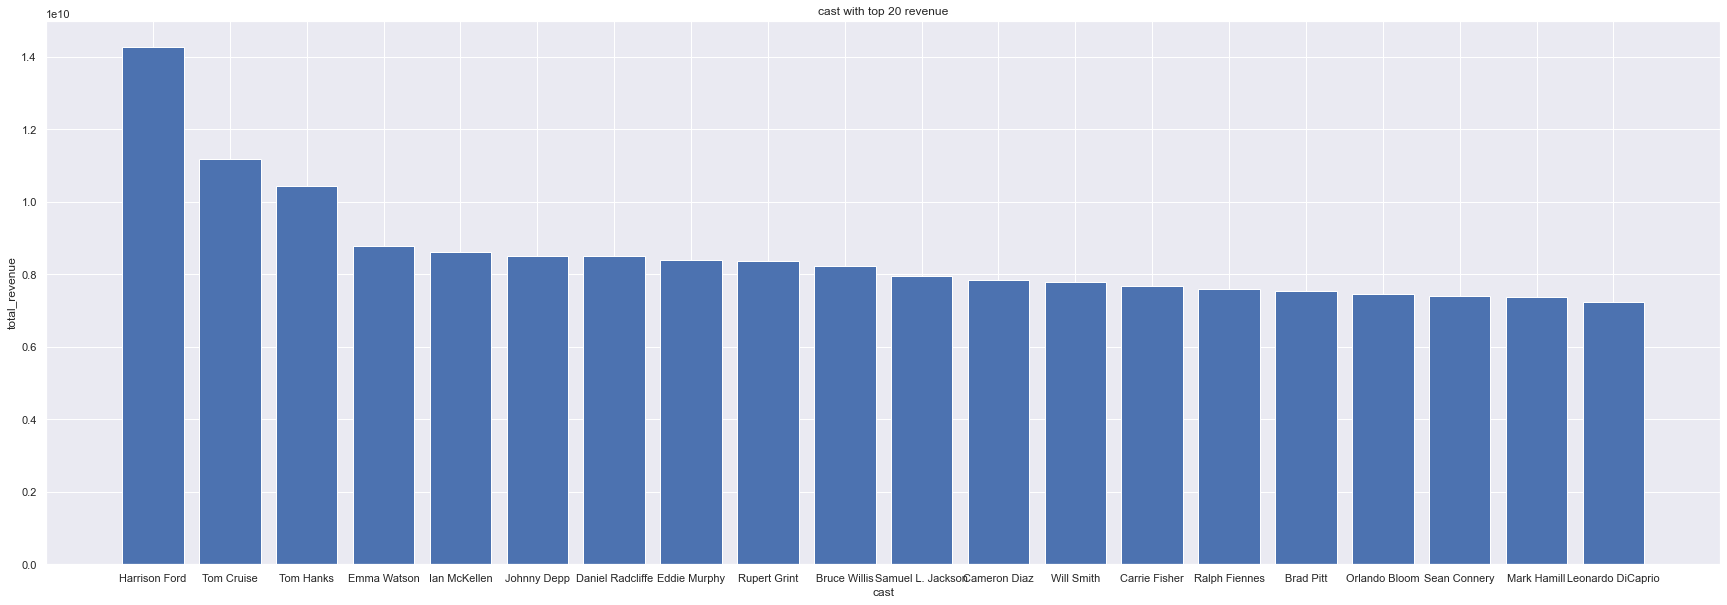

In [512]:
df_cast_revenue_top20 = df_cast_budget_revenue.sort_values(by = 'total_revenue', ascending = False).head(20)
plt.bar(df_cast_revenue_top20['cast'], df_cast_revenue_top20['total_revenue'])
plt.xlabel('cast')
plt.ylabel('total_revenue')
plt.title('cast with top 20 revenue')

In [513]:

df_cast_budget_revenue.sort_values(by ='appearance', ascending = False, inplace= True )
df_cast_apperance = df_cast_budget_revenue.head(20)

<a id='top 20 cast with apperance'></a>

Text(0.5, 1.0, 'top 20 cast with apperance')

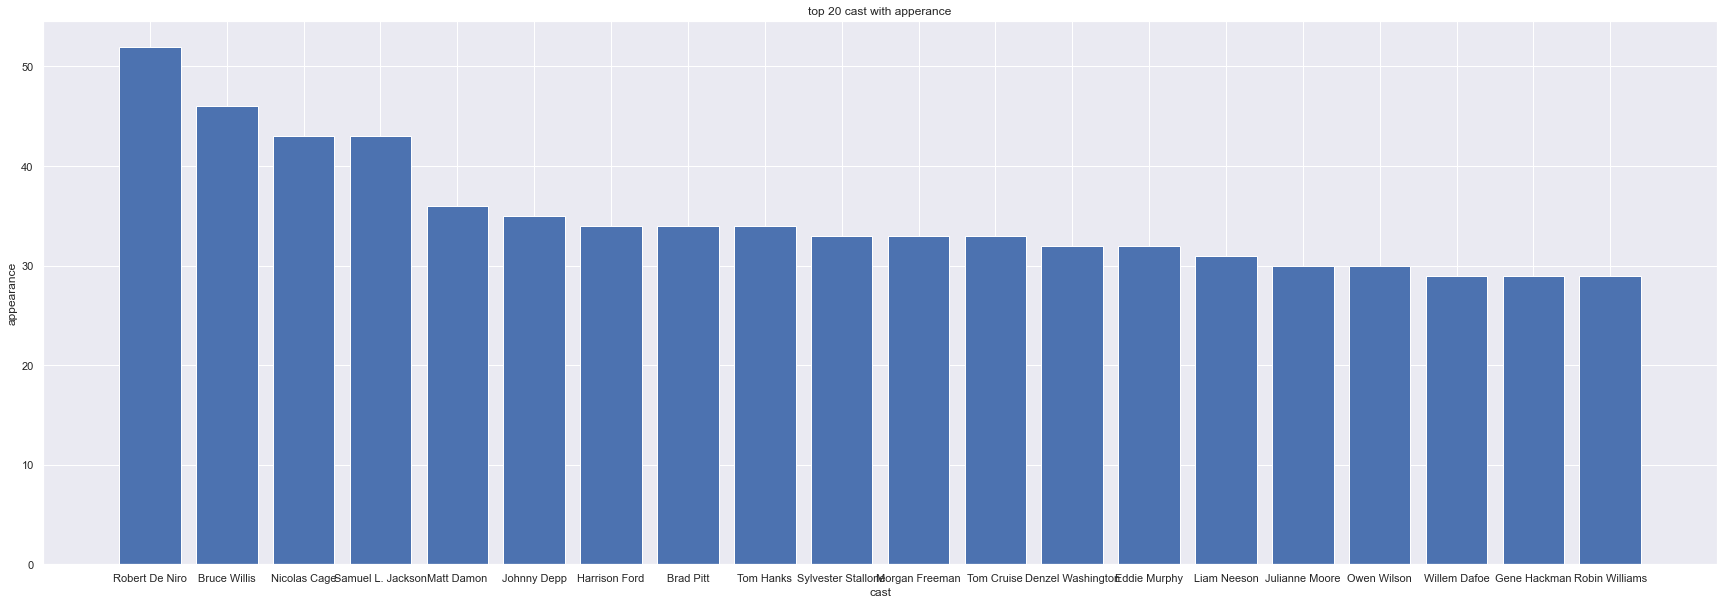

In [514]:
plt.bar(df_cast_apperance['cast'], df_cast_apperance['appearance'])
plt.xlabel('cast')
plt.ylabel('appearance')
plt.title('top 20 cast with apperance')

In [515]:
df_cast_revenue.sort_values(by ='average_revenue', ascending = False, inplace= True )
df_cast_average_revenue = df_cast_revenue.head(20)

In [516]:
df_cast_average_revenue

,cast,total_revenue,appearance,average_revenue
6670,Jason Miller,2.167325e+09,1,2.167325e+09
19,Daisy Ridley,1.902723e+09,1,1.902723e+09
5753,Robert MacNaughton,1.791694e+09,1,1.791694e+09
5374,Wendy Gazelle,1.583050e+09,1,1.583050e+09
5375,Ken Howard,1.583050e+09,1,1.583050e+09
6413,Martha Wentworth,1.574815e+09,1,1.574815e+09
6414,Ben Wright,1.574815e+09,1,1.574815e+09
6412,Betty Lou Gerson,1.574815e+09,1,1.574815e+09
6411,J. Pat O'Malley,1.574815e+09,1,1.574815e+09
16,Mark Hamill,7.379360e+09,5,1.475872e+09


<a id='top 20 cast with average_revenue'></a>

Text(0.5, 1.0, 'top 20 cast with average_revenue')

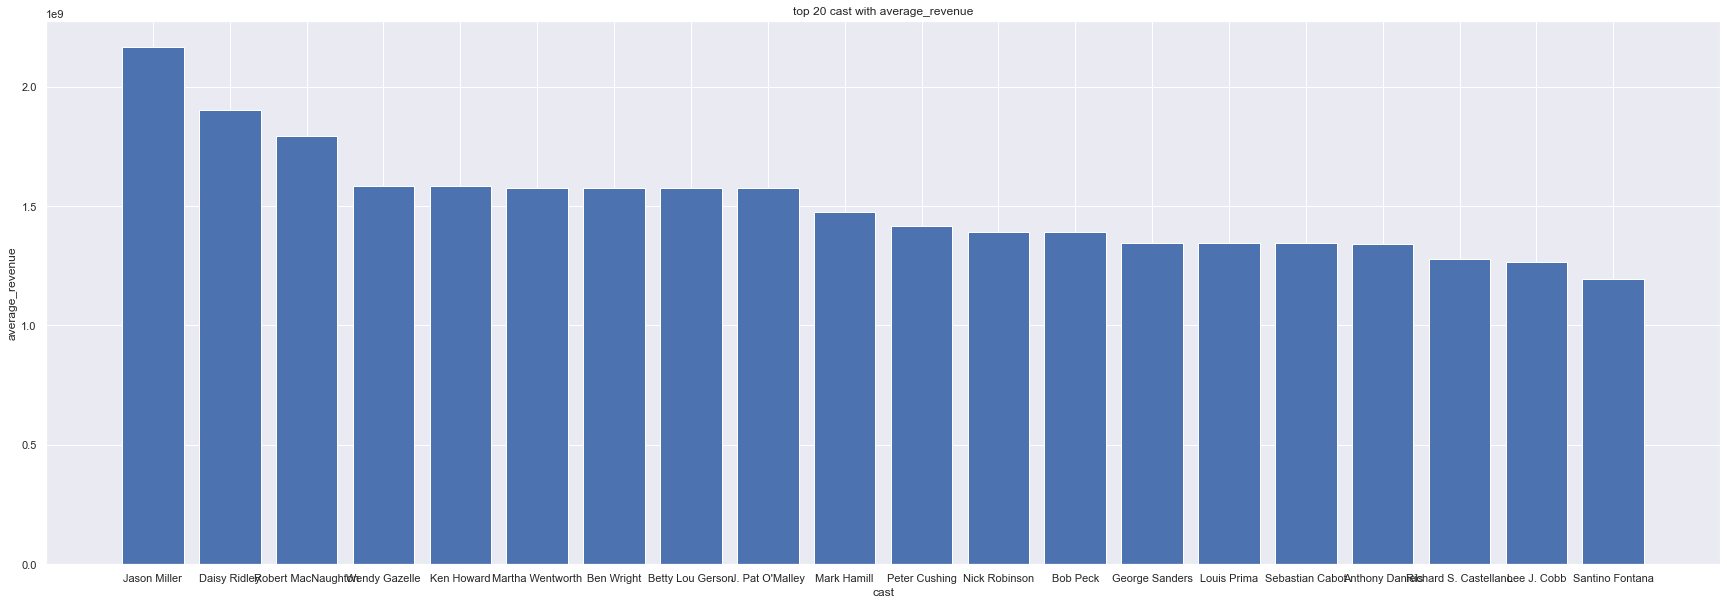

In [517]:
plt.bar(df_cast_average_revenue['cast'], df_cast_average_revenue['average_revenue'])
plt.xlabel('cast')
plt.ylabel('average_revenue')
plt.title('top 20 cast with average_revenue')

In [518]:
df_cast_revenue.sort_values(by ='average_revenue', ascending = False, inplace= True )
df_cast_average_revenue_5 = df_cast_revenue[df_cast_revenue['appearance'] >= 5].head(20)
df_cast_average_revenue_5

,cast,total_revenue,appearance,average_revenue
16,Mark Hamill,7.379360e+09,5,1.475872e+09
17,Carrie Fisher,7.678282e+09,7,1.096897e+09
1234,Rupert Grint,8.358341e+09,9,9.287045e+08
826,Emma Watson,8.790080e+09,12,7.325067e+08
501,Daniel Radcliffe,8.515082e+09,12,7.095902e+08
1378,Orlando Bloom,7.467083e+09,12,6.222570e+08
677,Ian McKellen,8.628837e+09,14,6.163455e+08
1229,Stephen Lang,2.996773e+09,5,5.993546e+08
1253,Ray Romano,2.930076e+09,5,5.860153e+08
1707,Julie Andrews,5.560047e+09,10,5.560047e+08


<a id='top 20 cast with average_revenue with at least 5 appearnce in movie'></a>

Text(0.5, 1.0, 'top 20 cast with average_revenue with at least 5 appearnce in movie')

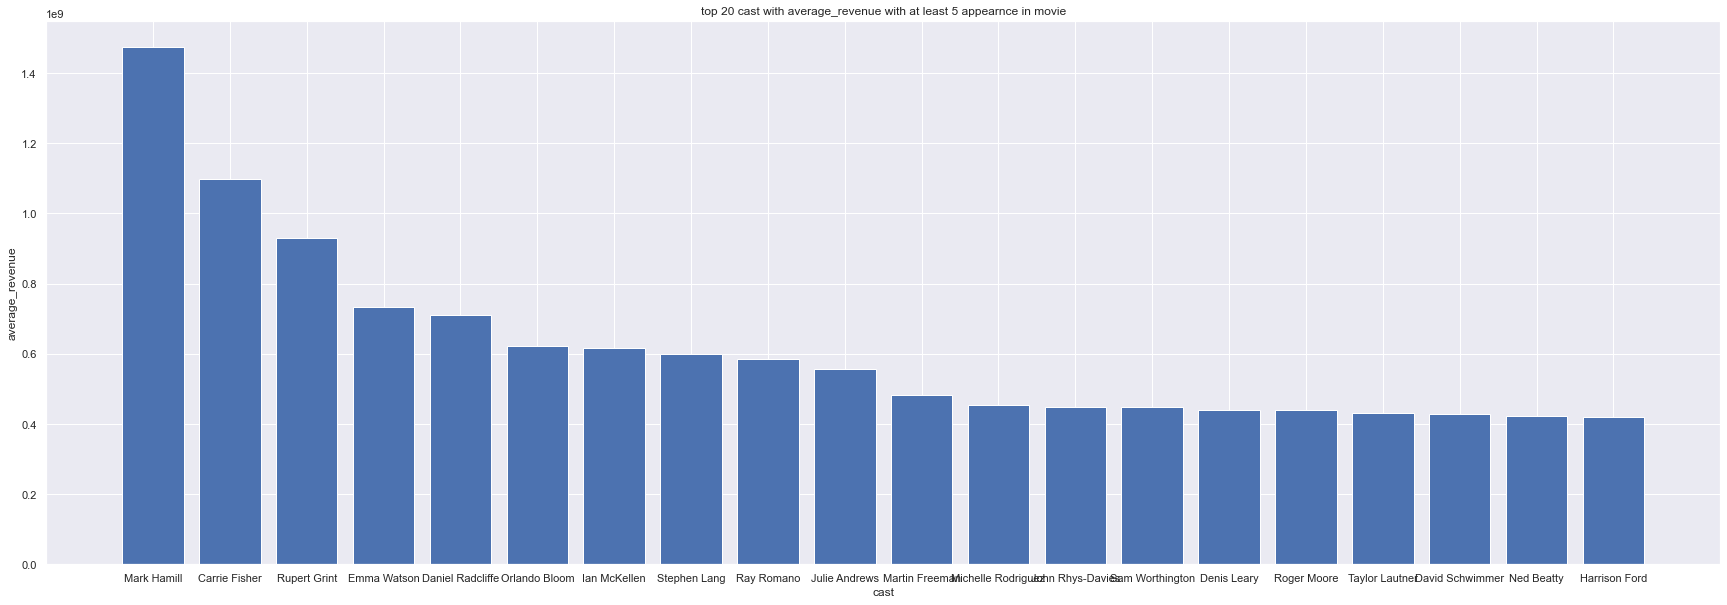

In [519]:
plt.bar(df_cast_average_revenue_5['cast'], df_cast_average_revenue_5['average_revenue'])
plt.xlabel('cast')
plt.ylabel('average_revenue')
plt.title('top 20 cast with average_revenue with at least 5 appearnce in movie')

<a id='cast which appears in movies which has the most profits in %'></a>

Text(0.5, 1.0, 'cast which appears in movies which has the most profits in %')

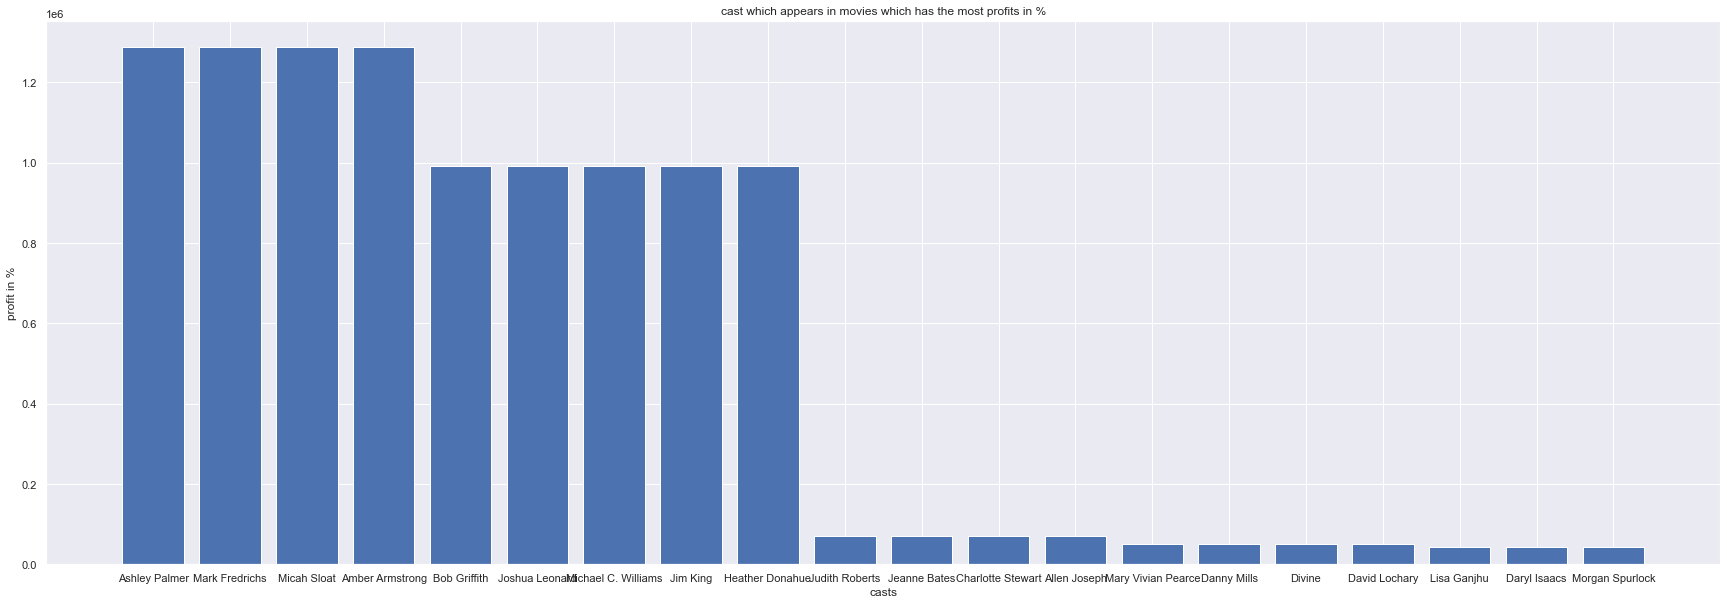

In [520]:
df_cast_budget_revenue.sort_values(by = 'profit_loss%',ascending = False, inplace = True)
df_cast_top_profit_perct = df_cast_budget_revenue.head(20)

plt.bar(df_cast_top_profit_perct['cast'], df_cast_top_profit_perct['profit_loss%'])
plt.xlabel('casts')
plt.ylabel('profit in %')
plt.title('cast which appears in movies which has the most profits in %')

<a id='cast which appears in movies which has the most loss in %'></a>

Text(0.5, 1.0, 'cast which appears in movies which has the most loss in %')

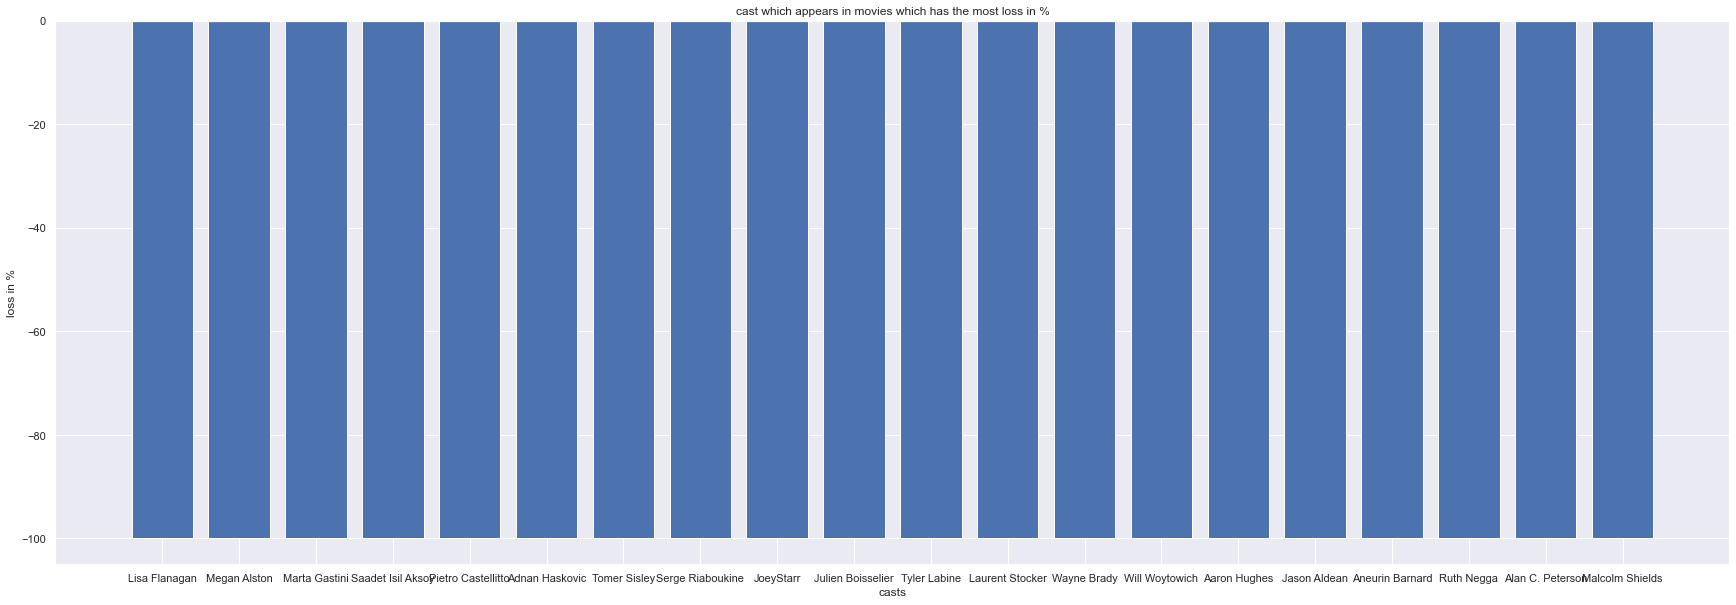

In [521]:
df_cast_budget_revenue.sort_values(by = 'profit_loss%',ascending = False, inplace = True)
df_cast_top_loss_perct = df_cast_budget_revenue.tail(20)


plt.bar(df_cast_top_loss_perct['cast'], df_cast_top_loss_perct['profit_loss%'])
plt.xlabel('casts')
plt.ylabel('loss in %')
plt.title('cast which appears in movies which has the most loss in %')

<a id='cast with at least 5 appearance in total and appears in movies which has the most profit in %'></a>

Text(0.5, 1.0, 'cast with at least 5 appearance in total and appears in movies which has the most profit in %')

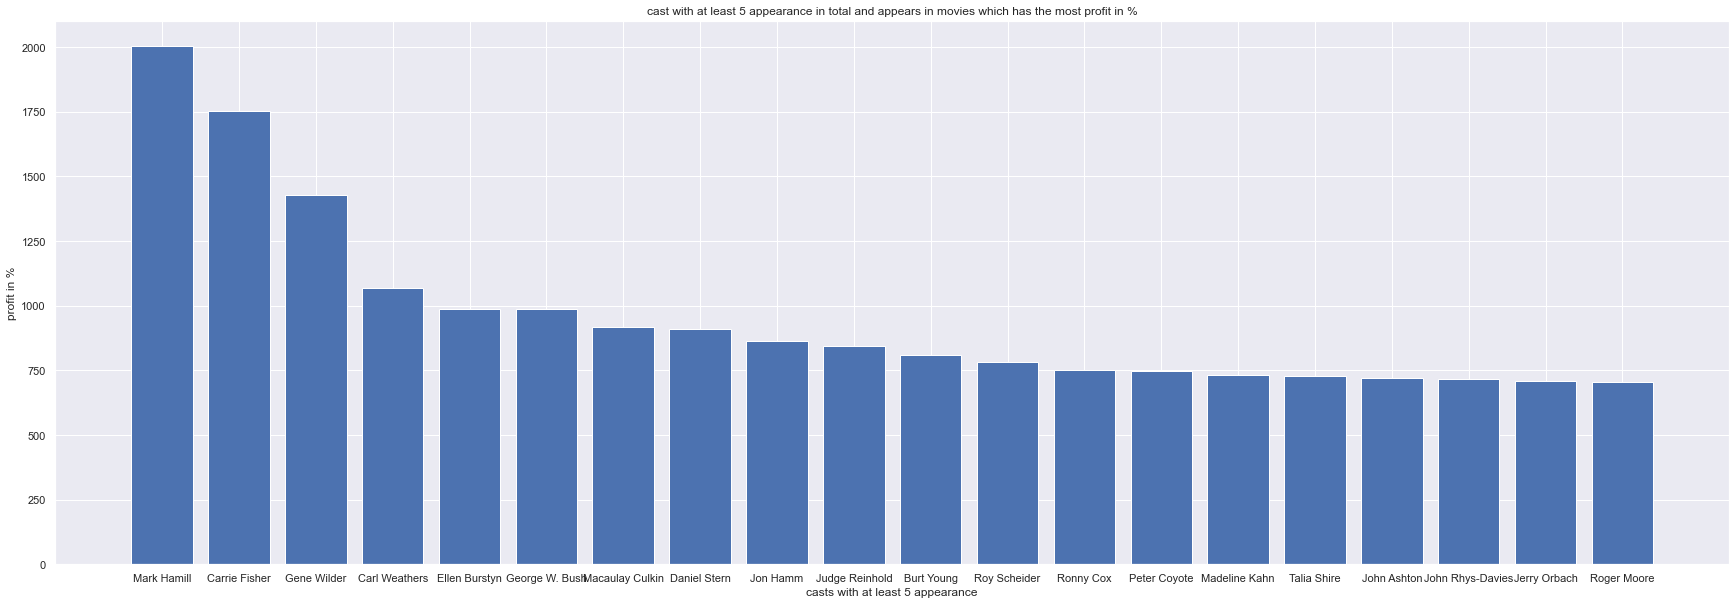

In [522]:
df_cast_budget_revenue.sort_values(by = 'profit_loss%',ascending = False, inplace = True)
df_cast_top_profit_perct_5 = df_cast_budget_revenue[df_cast_budget_revenue['appearance'] >= 5].head(20)


plt.bar(df_cast_top_profit_perct_5['cast'], df_cast_top_profit_perct_5['profit_loss%'])
plt.xlabel('casts with at least 5 appearance')
plt.ylabel('profit in %')
plt.title('cast with at least 5 appearance in total and appears in movies which has the most profit in %')

<a id='cast with at least 5 appearance in total and appears in movies which has the most loss in %'></a>

Text(0.5, 1.0, 'cast with at least 5 appearance in total and appears in movies which has the most loss in %')

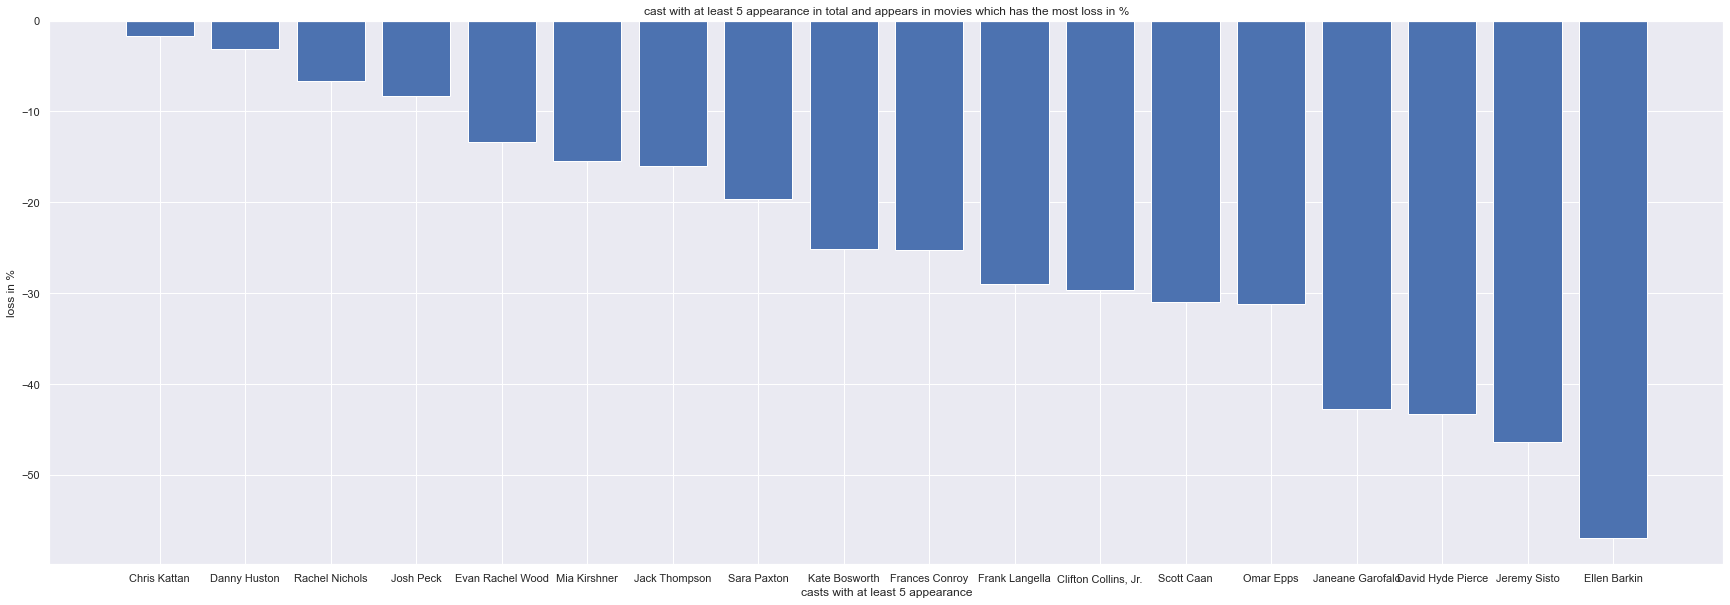

In [523]:
df_cast_budget_revenue.sort_values(by = 'profit_loss%',ascending = False, inplace = True)
df_cast_top_loss_perct_5 = df_cast_budget_revenue[df_cast_budget_revenue['appearance'] >= 5].tail(18)


plt.bar(df_cast_top_loss_perct_5['cast'], df_cast_top_loss_perct_5['profit_loss%'])
plt.xlabel('casts with at least 5 appearance')
plt.ylabel('loss in %')
plt.title('cast with at least 5 appearance in total and appears in movies which has the most loss in %')

In [529]:
df_cast_top_profit_perct_5

,cast,total_revenue,appearance,average_revenue,total_budget,average_budget,profit_loss%
16,Mark Hamill,7.379360e+09,5,1.475872e+09,3.510852e+08,7.021705e+07,2001.87
17,Carrie Fisher,7.678282e+09,7,1.096897e+09,4.145661e+08,5.922373e+07,1752.12
5906,Gene Wilder,1.345455e+09,5,2.690910e+08,8.803956e+07,1.760791e+07,1428.24
4149,Carl Weathers,2.223131e+09,7,3.175902e+08,1.906361e+08,2.723373e+07,1066.16
196,Ellen Burstyn,2.343306e+09,8,2.929132e+08,2.155973e+08,2.694966e+07,986.89
1809,George W. Bush,2.643222e+08,5,5.286444e+07,2.432240e+07,4.864481e+06,986.74
3353,Macaulay Culkin,1.580932e+09,6,2.634887e+08,1.557051e+08,2.595086e+07,915.34
5160,Daniel Stern,1.713297e+09,7,2.447567e+08,1.696531e+08,2.423615e+07,909.88
40,Jon Hamm,1.266459e+09,6,2.110765e+08,1.314015e+08,2.190026e+07,863.81
3321,Judge Reinhold,1.755567e+09,5,3.511134e+08,1.859557e+08,3.719113e+07,844.08


# CAST AND REVENUE
### SOME MOVIES WITH CERTAIN CASTS APPEARS TO HAVE MORE REVENUE THAN SOME 
### SOME MOVIES WITH CERTAIN CASTS ALSO APPEARS TO HAVE MORE PROFIT/LOSS THAN SOME 
>SOME CAST appears in movies than others **ROBERT DE NIRO** shows to appear in most movies appearing in 52 movies, followed by **BRUCE WILLIS** 46 appearance, **SAMUEL L. JACKSON** 44 appearance, **NICOLAS CAGE** 43 appearances, **MATT DAMON**  36 APPEARANCES, **JOHNNY DEPP, MORGAN FREEMAN, TOM HANKS, BRAD PITT, HARRISON FORD** all haves  35 appearance which all sum up the casts with the most appearance in moviesas shown in  <a href="#top 20 cast with apperance">in the chart here</a>.

>Revenue generated by movies casts appears in Varies, probabbly due to casts popularity. Total revenue of all the movies each cast is calculated by summing up revenue of each movies they appears in. movies **Harrison Ford** appears in shows to have the most revenue with 14285700000, followed by **Tom Cruise** with 11175070000, **Tom Hanks** with 10433510000, **Emma Watson**  with 8790080000, **Ian McKellen** with 8628837000 , **Johnny Depp** with 8518033000, **Daniel Radcliffe** with 8515082000, **Eddie Murphy** with  8403307000, **Rupert Grint** with 8358341000, **Bruce Willis** with 8236476000 who all are the top 10 cast who have the whose movies they appear in generates most revenue as shown <a href="#cast with top 20 revenue">in this chart</a>.

>Casts who appeared in more movies appears to have more total_revenue, so to get the cast whos more likely to affect the movie revenue, its ideal to use the average_revenue which finds the average revenue generated by each casts in movies they appeared in. **Jason Miller** appears to have the most average revenue with 2167325000 followed by **Daisy Ridley** with 1902723000, **Robert MacNaughton** with 1791694000, **Wendy Gazelle** with 1583050000, **Ken Howard** with 1583050000. out of the top20 cast with most average revenue in movies they appears in, just 4 appears in more 1 movie, **Mark Hamil** in 5 and **Peter Cushing, Anthony Daniels, Lee J. Cobb** appearing in just 2 movies. so basing it on average revenue might not been ideal since cast who appears in few movie shows to have higher average revenue as shown  <a href="#top 20 cast with average_revenue">in this chart here</a>.

>To get a more realistic average_revenue for the movies each casts appears in, only casts who appears in atleast 5 movies will be considered, with **Mark Hamill** who appears in 5 movie having movies he appears in having average revenue of  1475872000, followed by **Carrie Fisher** who appears in 7 movie and the movies has average revenue of 1096897000 and 7 movies , **Rupert Grint** with 928704500 and 9 movies,  **Emma Watson** 732506700 and 12 movies, **Daniel Radcliffe**  with 709590200 and 12 movies, **Orlando Bloom** with 622257000 and 12 movies, **Ian McKellen**  with 616345500 and 14 movies, **Stephen Lang** with 599354600 and 5 movies, **Ray Romano** with 586015300 and 5 movies appearance and **Julie Andrews** with 556004700 appearing in 10 movies, making the top 10 cast which movie they appeared in has the highest average revenue as shown  <a href="#top 20 cast with average_revenue with at least 5 appearnce in movie">in this chart</a>.

> **Micah Sloat, Amber Armstrong, Ashley Palmer, Mark Fredrichs** shows to appear in movie which has profit of 1288938.67%, **Jim King, Bob Griffith, Joshua Leonard, Michael C. Williams and Heather Donahue** appears in movie with 991900% profit as shown <a href="#cast which appears in movies which has the most profits in %">in this chart</a>.  while **Alan C. Peterson, Ruth Negga	, Malcolm Shields and Aneurin Barnard** appears in movie which recorded  -99.98% loss, **Adnan Haskovic** appears in movie with -99.97% loss while **Jason Aldean** appears in movie with -99.91%. all these casts appears in just one movie so its not ideal to use it to judge. its best to use casts who appears in at least 5 movie as shown <a href="#cast which appears in movies which has the most loss in %">in this chart</a>

>for casts who appeared in at least 5 movies, **Mark Hamil** tops with appearance in movies with highest profit(%) with 2000.87% on average, followed by **Carrie Fisher** with 1752.12%, **Gene Wilder** with 1428.24%, **Carl Weathers** with 1066.16% and **Ellen Burstyn** with 986.89% on averageWho are the top 5 casts with at least 5 appearance and appearing in movie with most profit on average <a href="#cast with at least 5 appearance in total and appears in movies which has the most profit in %"> as shown in this chart</a>.<br>
For casts who tops with appearance in movies with highest loss(%), **Ellen Barkin** tops with averaging -57% loss per movie, followed by **Jeremy Sisto** with -46.45% loss on average, **David Hyde Pierce** with -43.28% loss, **Janeane Garofalo** with -42.72% on average and **Omar Epps** appearing on movie who made loss of -31.25% on average. Who are the top 5 casts with at least 5 appearance and appearing in movie with most loss on average. <a href="#cast with at least 5 appearance in total and appears in movies which has the most loss in %"> as shown in this chart </a>
    
   

## Research Question 8 (production company and revenue/profit_loss%)

>since some movie has more than one production company, the code below add the revenue of each production each casts appeard in, and sum it to gether to get the total revenue of the movies they produced, the production_company-count holds the number of movies each company produced.

In [531]:
df_1.value_counts('production_companies')

production_companies
Paramount Pictures                                                             77
Universal Pictures                                                             56
Columbia Pictures                                                              39
New Line Cinema                                                                37
Warner Bros.                                                                   33
                                                                               ..
Imagine Entertainment|Ixtlan Productions|Carolco Pictures|Bill Graham Films     1
Imagine Entertainment|Malpaso Productions|Relativity Media                      1
Imagine Entertainment|Malpaso Productions|Wintergreen Productions               1
Imagine Entertainment|Mikona Productions GmbH & Co. KG                          1
icon                                                                            1
Length: 2982, dtype: int64

In [532]:
all_company = []
total_budget = []
company_count = []


for companys, budget in zip(df_1['production_companies'].astype(str), df_1['budget_adj']):
    companys = companys.split("|")
    for company in companys:
        if company not in all_company:
            all_company.append(company)
            total_budget.append(budget)
            company_count.append(1)
        else:
            company_index =  all_company.index(company)
            company_count[company_index] += 1
            total_budget[company_index] += budget

df_company_budget =  pd.DataFrame({'company': all_company, 'total_budget': total_budget, 'movies_count': company_count})
df_company_budget['average_budget'] = df_company_budget['total_budget'] / df_company_budget['movies_count']
df_company_budget.sort_values(by ='total_budget', ascending = False, inplace= True )
df_company_budget

,company,total_budget,movies_count,average_budget
39,Warner Bros.,2.304582e+10,324,7.112907e+07
14,Universal Pictures,1.786877e+10,327,5.464456e+07
23,Paramount Pictures,1.593355e+10,265,6.012660e+07
25,Twentieth Century Fox Film Corporation,1.261877e+10,201,6.277995e+07
34,Columbia Pictures,1.162562e+10,178,6.531249e+07
...,...,...,...,...
1646,Coatwolf Productions,1.647977e+04,1,1.647977e+04
1639,The Bureau,7.755184e+03,1,7.755184e+03
1640,Glendale Picture Company,7.755184e+03,1,7.755184e+03
1641,Synchronicity Films,7.755184e+03,1,7.755184e+03


In [533]:
all_company = []
total_revenue = []
company_count = []


for companys, revenue in zip(df_1['production_companies'].astype(str), df_1['revenue_adj']):
    companys = companys.split("|")
    for company in companys:
        if company not in all_company:
            all_company.append(company)
            total_revenue.append(revenue)
            company_count.append(1)
        else:
            company_index =  all_company.index(company)
            company_count[company_index] += 1
            total_revenue[company_index] += revenue

df_company_revenue =  pd.DataFrame({'company': all_company, 'total_revenue': total_revenue, 'movies_count': company_count})
df_company_revenue['average_revenue'] = df_company_revenue['total_revenue'] / df_company_revenue['movies_count']
df_company_revenue.sort_values(by ='total_revenue', ascending = False, inplace= True )
df_company_revenue

,company,total_revenue,movies_count,average_revenue
39,Warner Bros.,6.696881e+10,324,2.066938e+08
14,Universal Pictures,6.047437e+10,327,1.849369e+08
23,Paramount Pictures,5.413069e+10,265,2.042668e+08
25,Twentieth Century Fox Film Corporation,5.037067e+10,201,2.506003e+08
31,Walt Disney Pictures,3.667857e+10,116,3.161946e+08
...,...,...,...,...
1862,Enderby Entertainment,2.852082e+03,1,2.852082e+03
1893,H2O Motion Pictures,2.394305e+03,1,2.394305e+03
1894,2262730 Ontario,2.394305e+03,1,2.394305e+03
1895,Middle Child Films Inc.,2.394305e+03,1,2.394305e+03


In [535]:
df_company_budget_revenue = pd.concat([df_company_budget, df_company_revenue[['total_revenue', 'average_revenue']]], axis = 1)
df_company_budget_revenue

,company,total_budget,movies_count,average_budget,total_revenue,average_revenue
0,Universal Studios,4.621440e+08,8,5.776800e+07,2.153568e+09,2.691960e+08
1,Amblin Entertainment,4.185169e+09,50,8.370338e+07,2.057594e+10,4.115187e+08
2,Legendary Pictures,3.856384e+09,37,1.042266e+08,1.174986e+10,3.175639e+08
3,Fuji Television Network,2.346763e+08,3,7.822543e+07,1.720500e+09,5.735000e+08
4,Dentsu,1.091635e+09,12,9.096958e+07,4.909579e+09,4.091315e+08
...,...,...,...,...,...,...
3234,Solofilm,1.169945e+07,1,1.169945e+07,8.038036e+07,8.038036e+07
3235,Nepenthe Productions,3.342701e+06,1,3.342701e+06,1.241401e+07,1.241401e+07
3236,Watership Productions,3.342701e+06,1,3.342701e+06,1.241401e+07,1.241401e+07
3237,Chenault Productions,5.038511e+07,1,5.038511e+07,2.266436e+08,2.266436e+08


In [537]:
df_company_budget_revenue['profit_loss%'] = round(((df_company_budget_revenue['total_revenue'] - df_company_budget_revenue['total_budget'])/ df_company_budget_revenue['total_budget'] ) *100, 2)
df_company_budget_revenue

,company,total_budget,movies_count,average_budget,total_revenue,average_revenue,profit_loss%
0,Universal Studios,4.621440e+08,8,5.776800e+07,2.153568e+09,2.691960e+08,365.99
1,Amblin Entertainment,4.185169e+09,50,8.370338e+07,2.057594e+10,4.115187e+08,391.64
2,Legendary Pictures,3.856384e+09,37,1.042266e+08,1.174986e+10,3.175639e+08,204.69
3,Fuji Television Network,2.346763e+08,3,7.822543e+07,1.720500e+09,5.735000e+08,633.14
4,Dentsu,1.091635e+09,12,9.096958e+07,4.909579e+09,4.091315e+08,349.75
...,...,...,...,...,...,...,...
3234,Solofilm,1.169945e+07,1,1.169945e+07,8.038036e+07,8.038036e+07,587.04
3235,Nepenthe Productions,3.342701e+06,1,3.342701e+06,1.241401e+07,1.241401e+07,271.38
3236,Watership Productions,3.342701e+06,1,3.342701e+06,1.241401e+07,1.241401e+07,271.38
3237,Chenault Productions,5.038511e+07,1,5.038511e+07,2.266436e+08,2.266436e+08,349.82


In [568]:
df_company_top_revenue = df_company_budget_revenue.sort_values( by = 'total_revenue', ascending = False).head(15)
df_company_top_profit = df_company_budget_revenue.sort_values( by = 'profit_loss%', ascending = False).head(15)
df_company_top_loss = df_company_budget_revenue.sort_values( by = 'profit_loss%')
df_company_most_movies = df_company_budget_revenue.sort_values( by = 'movies_count', ascending = False).head(15)
df_company_top_profit_10 = df_company_budget_revenue[df_company_budget_revenue['movies_count'] >= 10].sort_values( by = 'profit_loss%', ascending = False).head(15)
df_company_top_loss_5 = df_company_budget_revenue[df_company_budget_revenue['movies_count'] >= 5].sort_values( by = 'profit_loss%').head(15)
df_company_top_average = df_company_budget_revenue[df_company_budget_revenue['movies_count'] >= 10].sort_values( by = 'total_revenue', ascending = False).head(15)

Text(0.5, 1.0, 'Production Companies with the most movies')

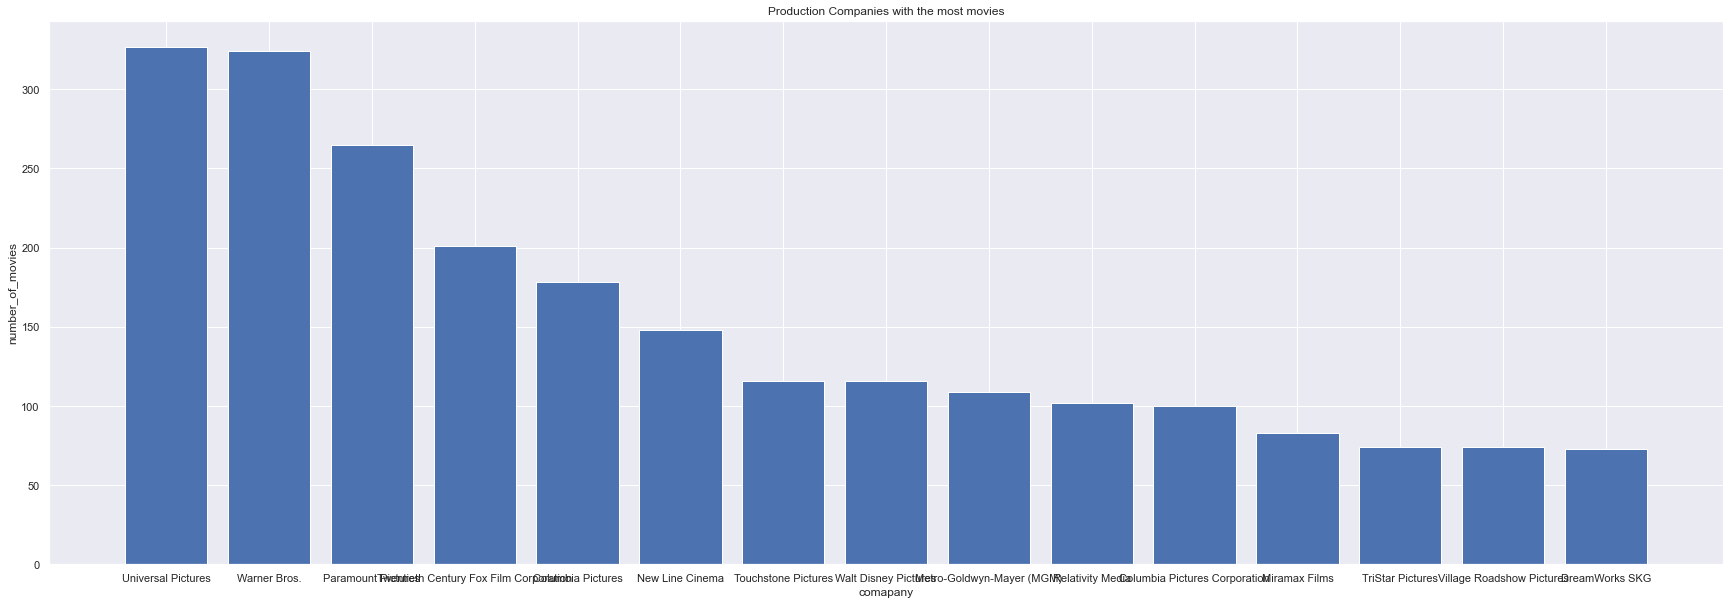

In [552]:
plt.bar(df_company_most_movies['company'], df_company_most_movies['movies_count'])
plt.xlabel('comapany')
plt.ylabel('number_of_movies')
plt.title('Production Companies with the most movies')

> **Universal Pictures** aappears to be the production companies with the most movies with 327 movies, followed by **Warner Bros.** with 324 movies, **Paramount Pictures** with 265 movies, **Twentieth Century Fox Film Corporation** with 201 movies, **Columbia Pictures** with 178 movies which sum up the list of production companies with most movies

Text(0.5, 1.0, 'Production Companies with the most profit in percentage')

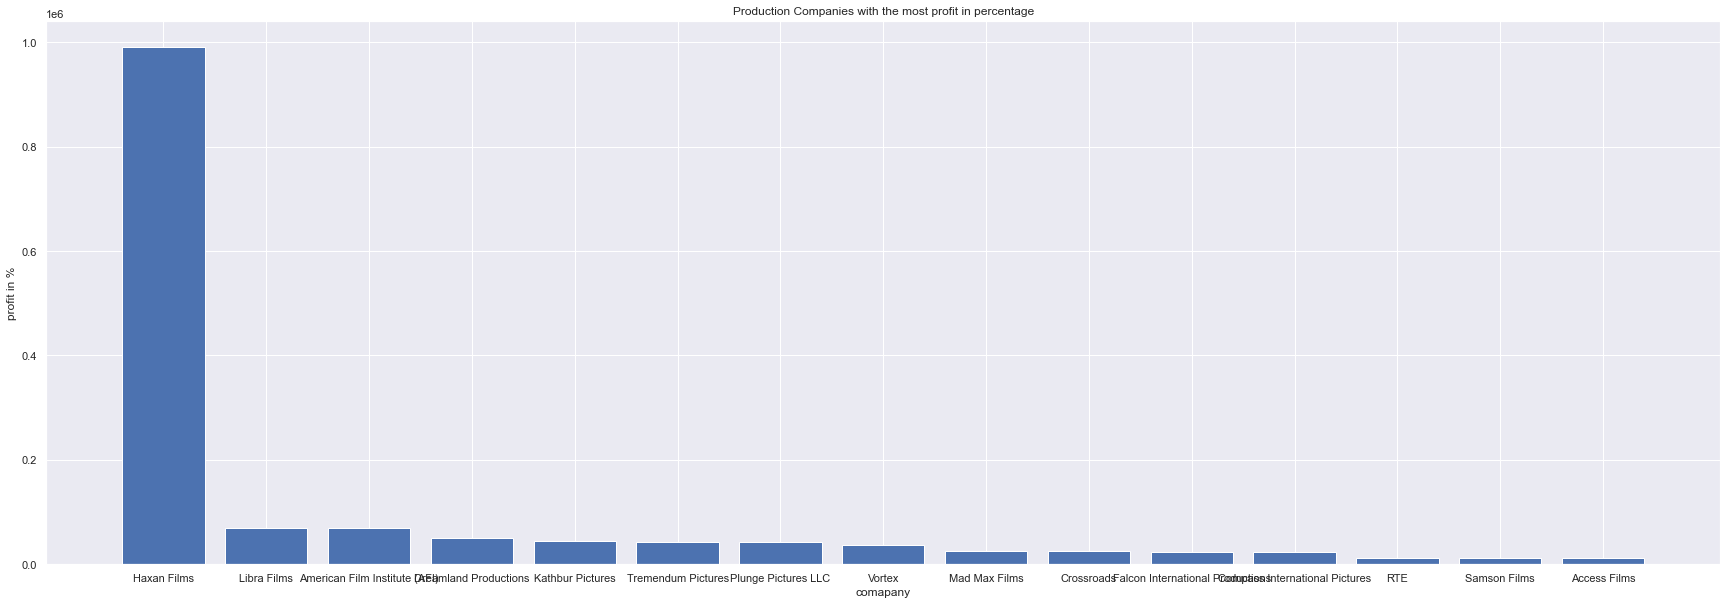

In [557]:
plt.bar(df_company_top_profit['company'], df_company_top_profit['profit_loss%'])
plt.xlabel('comapany')
plt.ylabel('profit in %')
plt.title('Production Companies with the most profit in percentage')


> **Haxan Films** appears to be the compaany with the most profit percentage, eith a mouth watering 991900% profit, followed by **Libra Films8 and  **American Film Institute (AFI)** with 69900%, **Dreamland Productions*8 with 49900% and **Kathbur Pictures** with 43861%. going through the data shows the virtually companies who tops the list are comapies with just one movies, so to its better to base the judgement of most profit on companies with at leasdt 10 movies

Text(0.5, 1.0, 'Production Companies with the most profit in percentage')

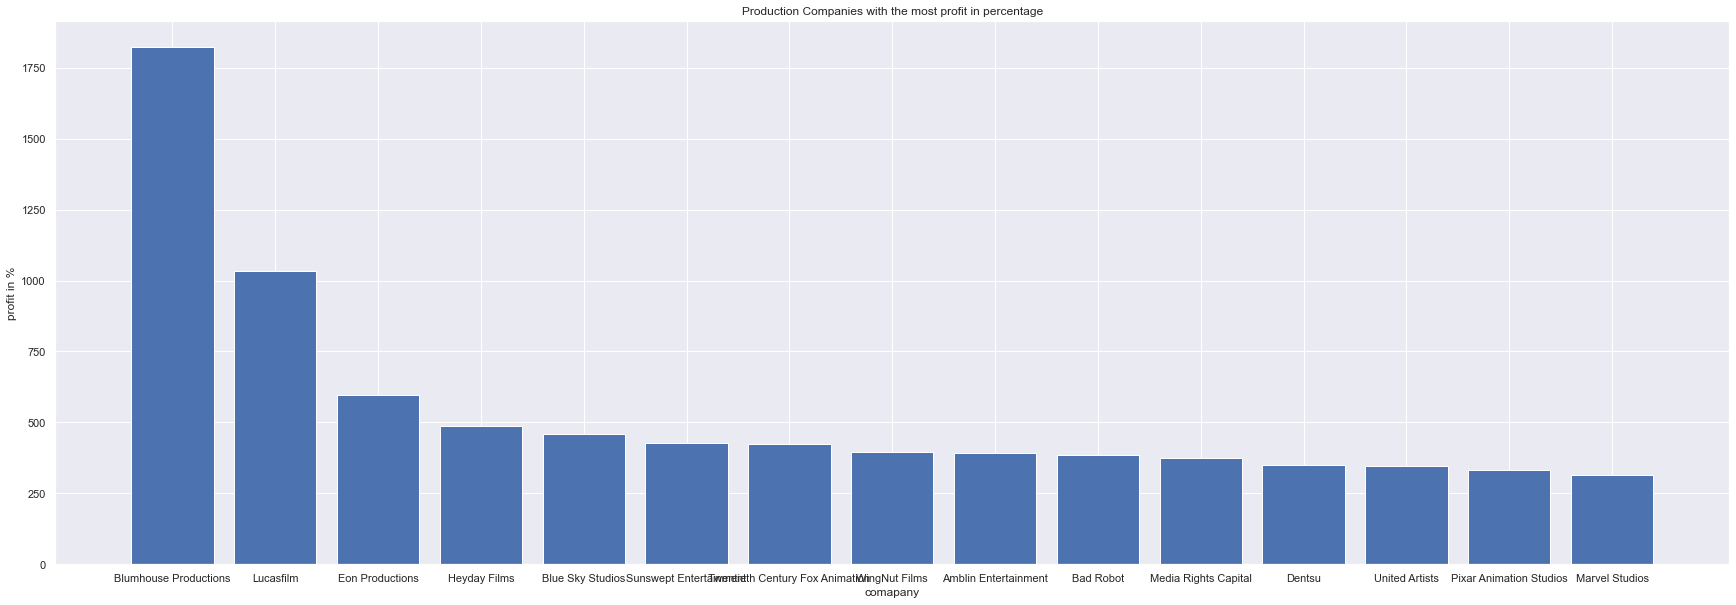

In [558]:
plt.bar(df_company_top_profit_10['company'], df_company_top_profit_10['profit_loss%'])
plt.xlabel('comapany')
plt.ylabel('profit in %')
plt.title('Production Companies with the most profit in percentage')


> for companies with atleast 10 movies, **Blumhouse Productions** tops with the most profit percentage with 1824.53%, followed by **Lucasfilm** with 1034.46%, **Eon Production** with 598.15%, **Heyday Films** with 486.98% and **Blue Sky Studios** with 460.74%. the above Production companies are the top 5 companies with the most profit% who had at least 10 movies produced

Text(0.5, 1.0, 'Production Companies with the most loss in percentage')

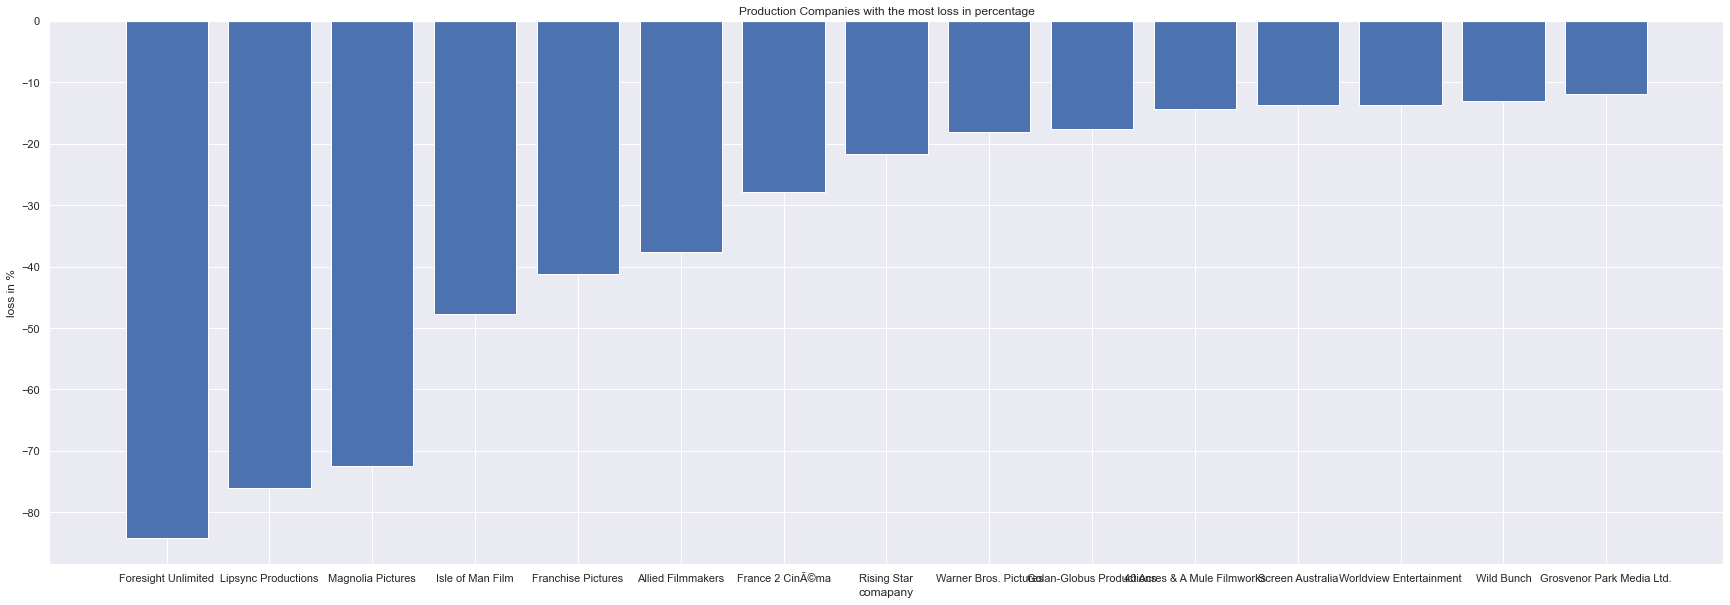

In [564]:
plt.bar(df_company_top_loss_5['company'], df_company_top_loss_5['profit_loss%'])
plt.xlabel('comapany')
plt.ylabel('loss in %')
plt.title('Production Companies with the most loss in percentage')


> for movies who run at loss,  **'Middle Child Films Inc.',
 '2262730 Ontario',
 'H2O Motion Pictures',
 'Afrodita Audiovisual, A.I.E.',
 'Raindance Entertainment',
 'Mythic International Entertainment',
 'Dispictures',
 'Georgia International Films',
 'Rex Media',
 'MÃ¶bius Entertainment',
 'Pierce-Williams',
 'Between The Eyes',
 'Gordon Bijelonic / Datari Turner Films',
 'Enderby Entertainment',
 'KODA Entertainment',
 'Media Programme of the European Community',
 'Procirep',
 'Centre National de la CinÃ©matographie (CNC)',
 'ERP Productions',
 'Tempesta Films',
 'Good Night Productions',
 'Film Export Group',
 'Enrique Cerezo Producciones CinematogrÃ¡ficas S.A.',
 'Arcadia Motion Pictures',
 'WhiteFlame Productions',
 'A2 Entertainment Group',
 '2 Bridges Productions',
 'Boy in the Box',
 'Qatsi Productions',
 'Brood Syndicate',
 'Buffalo Gal Pictures',
 'Cine Grande Corporation',
 'Conquistador Entertainment',
 'Algonquin Productions Limited',
 'Filmline International',
 'B.D.S. Productions Inc.',
 'Tri Vision Pictures',
 'Mass Hysteria Entertainment',
 'Silver Plane Films',
 'Gato Negro Films',
 'Three Good Men',
 'Wanda VisiÃ³n S.A.',
 'Immortal Thoughts',
 'Rival Pictures',
 'Instinctive Film',
 'Ink Connection',
 'Preferred Content',
 'Julijette',
 'Tornasol Films',
 'Zoetrope Argentina',
 'Fewlas Entertainment',
 'Cuatro Plus Films',
 'Hugo Productions',
 'First Floor Features',
 'Dark Harbor Stories',
 'Film4 Productions',
 'Insight Film Releasing',
 'Darius Films',
 'iDeal Partners Film Fund',
 'Altus Productions',
 'Ealing Metro International',
 'RCS',
 'Newcomm',
 'Ternion Pictures',
 'Lolita Productions',
 'Moving Pictures Film and Television',
 'Social Capital',
 'Procinvest Sas',
 'Cinedigm',
 'Eclectic pictures',
 'Cannon Productions',
 'CinÃ©@',
 'Savage Films',
 'ArieScope Pictures',
 'Waterland',
 'Waterland Film',
 'Artemis',
 'area japan',
 'Senator Entertainment Co',
 'Studio Trite',
 'Phantasma',
 'Team Ninja',
 'Decoding Annie Parker',
 'Ozymandias Productions',
 'Media House Capital',
 'Unified Pictures',
 'Milk & Media',
 'Constance Media',
 'Boram Entertainment Inc.',
 'Ozla Productions',
 'Four of a Kind Productions',
 'Jerkschool Productions',
 'Namco',
 'Light Song Films',
 'Dorset Productions',
 'Robert H. Solo Productions',
 'Dot Dot Dot Productions',
 'Stardust Pictures',
 'Renn Productions',
 'Chad Troutwine Films',
 'Loki Films',
 'Human Worldwide',
 'Green Film Company',
 'Blank of the Dead Productions',
 'Devonshire Productions',
 'New Romero',
 'Volten',
 'Purple Papaya Films',
 'Lailaps Pictures',
 'Continental Producciones',
 'TelevisiÃ³n de Galicia (TVG) S.A.',
 'Destro Films',
 'Kojo Pictures',
 'Maraci/Edelstein Films',
 'Shelter Productions',
 'Dark Sky Films',
 'Accent Films',
 'Cominco',
 'C.O. Films',
 'Movie Prose',
 'City Lights Pictures',
 'Shadow Shows',
 'Corvid Pictures',
 'Sly Predator',
 'Matt Baer Films',
 'Blitz Films',
 'Isabella Films BV',
 'Memfis Film',
 'Films en Stock',
 'Egoli Tossell Film AG',
 'North by Northwest Entertainment',
 'A Bigger Boat',
 'Off Hollywood Pictures',
 'Belladonna Productions',
 'Arte France',
 'Anagram Pictures Inc.',
 'The Last Picture Company',
 'DRO Entertainment',
 'Movie Central Network',
 'Quest',
 'Essaness Pictures',
 'Semtex Films',
 'Eureka Pictures',
 'Codi S.p.a.',
 'Company Films',
 'VIP Media Group',
 'Michael Mailer Films',
 'Ledge Productions',
 'HSX Films',
 'Unisol 3 Distribution',
 'Essential Pictures',
 'Mr. Tamborine Man',
 'Tax Credit Finance',
 'Victoria Filmproduktion',
 'Proud Mary Entertainment',
 'Unanimous Pictures',
 'Filmula',
 'TrollhÃ¤ttan Film AB',
 'Filmstiftung Nordrhein-Westfalen',
 'Det Danske Filminstitut',
 'Carthago Films S.a.r.l.',
 'Green Parrot',
 'Timothy Burrill Productions',
 'Trinity Filmed Entertainment',
 'Thinkfilm',
 'Crusader Entertainment',
 'Pan EuropÃ©enne Production',
 'Rainmark Films',
 'CTV International',
 'Glass Eye Pix',
 'Intuition Films',
 'Avalon/NFU Studios',
 'Amalgam Features',
 'Waypoint Entertainment',
 'Lightstream Pictures',
 'TheThird Mind Pictures',
 'High Frequency Entertainment',
 'Shapiro-Glickenhaus Entertainment',
 'Dalian Wanda Group',
 'Mpower Pictures',
 'Rollercoaster Entertainment',
 'Hannibal Pictures',
 'Vortex Words Pictures',
 'An Olive Branch Productions',
 'Mockingbird Pictures',
 'Jack and Henry Productions Inc.',
 'Longfellow Pictures',
 'Zanuck Independent',
 'MediaPro Pictures',
 'Insight Film Studios',
 'Redwood Palms Pictures',
 'Freestyle Releasing',
 'Mars Distribution',
 'LGM Productions',
 'Boll KG',
 'Bleiberg Entertainment',
 'Tristone Entertainment Inc.',
 'M Company',
 'Six Point Harness',
 'Goliath Entertainment',
 'Ars Nova',
 'Manifest Film Company',
 'Solar Filmworks',
 'RCR Media Group',
 'Quincy Jones-David Salzman Entertainment',
 'Forest Park Pictures',
 'Starstream Entertainment',
 'Abbolita Productions',
 'Class 5 Films',
 'Virtual Films',
 'Langley Films',
 'Remstar Productions',
 'Partizan',
 'Almega Projects',
 'Bron Studios',
 'Les Productions du TrÃ©sor',
 'Ambush Entertainment',
 'Crimson Bolt',
 'VIP 4 Medienfonds',
 'Max TV',
 'Prime Time',
 'Isabella Films B.V.',
 'Fu Works',
 'Isabella Films',
 'Transfilm',
 'Iron Film',
 'Prima TV',
 'Doha Film Institute, The',
 'Taormina Productions',
 'Start Motion Pictures',
 'Little Wave Productions',
 'Pantelion Films',
 'Synchronistic Pictures',
 'Outlander Productions',
 'Red Lion Sarl',
 'Corsan',
 'UAA Films',
 'Western Film Productions',
 'The Harold Greenberg Fund',
 'Geneon Entertainment',
 'Appleseed Film Partners',
 'Digital Frontier',
 'Tokyo Broadcasting System (TBS)',
 'The Mirisch Production Company',
 'Mirisch Films',
 'Adelaide Film Festival',
 'SBS Independent',
 'Fandango',
 'Sir Nigel Films',
 'Vertigo Productions',
 'Low Spark Films',
 'Echo Lake Entertainment',
 'Ithaca Pictures',
 'Captivity Productions',
 'RAMCO',
 'Foresight Unlimited',
 'Animus Films',
 'Helios-Filmproduktion',
 'OB Productions',
 'Screenland Pictures',
 'TMC Films',
 'Cipher Films',
 'Stealth Films Limited',
 'Open City Films',
 'Senator Film',
 'Freerunning',
 'Saban Films',
 'Melbarken',
 'ATR Films',
 'MMP Erste Filmproduktions',
 'Moviemakers Productions (MMP)',
 'Lascaux Films',
 'Latitude Productions',
 'Czech Anglo Productions',
 'Wandering Star Pictures',
 'Autonomous Films',
 'RKO Pictures',
 'Lime Orchard Productions',
 'McLaughlin Films',
 'Broad Green Pictures',
 'Noruz Films',
 'Dante Entertainment',
 '120dB Films',
 'Nutcracker Holdings',
 'Russian Roulette Ltd.',
 'Vnesheconombank',
 'HCC Media Group',
 'Day Twenty- Eight Films',
 'Rishon Films',
 'Deuce Three Productions',
 'Atlantic Swiss Productions',
 'Sunset Gower Studios',
 'Projection Pictures',
 'Henceforth',
 'London Boulevard',
 'Xuxa Producciones S.L.',
 'Porchlight Films',
 'Backup Films',
 'Arte France CinÃ©ma',
 'CinemaNX',
 'TF1 International',
 'Hyperion Pictures',
 'Capella',
 'Koppelmann/Bandier-Carnegie Pictures',
 'Dreamachine',
 'K5 International',
 'TempÃªte Sous Un CrÃ¢ne Productions',
 'On My Own',
 'Pandora Cinema',
 'Applied Action',
 'KGB Media',
 'Paper Street Films',
 'Le Bureau',
 'Jaibol Films',
 'Agent Two',
 'Brandt/Haas Productions',
 'Kaleidoscope Films',
 '3L Filmverleih',
 'Patalex Productions',
 'Whizbang Films',
 'Telefilm Canada',
 'Don Bluth',
 'Filmworks/FX',
 'Prettybird',
 'Post Empire Films',
 'Sodium Fox',
 'Antietam Filmworks',
 'Colgems Productions Ltd.',
 'Long Distance Films',
 'Rectangle Productions',
 'Les CinÃ©mas de la Zone',
 'Oscilloscope Laboratories',
 'C.G. Cinema',
 'CAB Productions',
 'Midnight Picture Show',
 'Pallas Film',
 'Cheetah Vision',
 'Baumgarten-Prophet Entertainment',
 'Lipsync Productions',
 'IDEA Filmproduktions',
 'Lost Highway Productions',
 'October Films',
 'Calimari Productions',
 'Retro-juice Productions',
 'Veneration Music',
 'Unstoppable Entertainment',
 'Goldsmith-Thomas Productions',
 'Scorpion Film Production',
 'Abramoff Production',
 'abramoff Production',
 'Opera Film Produzione',
 'Summertime Entertainment',
 'Morag Loves Company',
 'Max Films Productions',
 'Le Studio Canal+',
 'After Dark Films',
 'Jigsaw Productions',
 'Magnolia Pictures',
 'NVSH Productions',
 'The Harvey Boys',
 'Fuller Films',
 'Taryn Prov',
 'Occupant Entertainment',
 'Battleplan Productions',
 'Eclectic Films',
 'SuperMega',
 'Cinetel Films',
 'Family of the Year Productions',
 'Tapioca Films',
 'Allegro Films',
 'Fuji Eight Company Ltd.',
 'Super Ecran',
 'Fries Film Group',
 'Alfama Films',
 'Flyboys Films',
 'Werc Werk Works',
 'Corrino Media Corporation',
 'Staccato Films',
 'A Loopy Production LLC',
 '2 Loop Films',
 'Persistent Entertainment',
 'Creative Scotland',
 'Film Fund Luxembourg',
 'Hercules Films',
 'Atlas Productions',
 'Ultra Muchos Productions',
 'Lone Runner Entertainment',
 'Kenio Films',
 'Perfect Game, The',
 'HighRoad Entertainment',
 'Red Envelope Entertainment',
 'Rai Cinema',
 'Lago Films',
 'See Film',
 'Blue Rider Pictures',
 'Electric Entertainment',
 'Nordisk Tonefilm International',
 'Gorky Film Studio',
 'Metanoia Films',
 'Laredo',
 'Krisjair',
 'Plum Pictures',
 'Battle Mountain Films',
 'VBT Productions',
 'Ballpark Productions Partnership',
 'Baumgarten Merims Productions',
 'N1 European Film Produktions GmbH & Co. KG',
 'Pellikola',
 'Turner Pictures',
 'Smartest Man Productions',
 "We're Not Brothers Productions",
 'Cinelou Films',
 'Numb Gums Production Inc.',
 'ABC Pictures',
 'Delux Productions',
 'Future Films',
 'Dreambridge Films',
 'Liddell Entertainment',
 'Wonderful Films PLC',
 'Warp X',
 'Rook Films',
 'CinÃ©a',
 'Busy Bee Productions',
 'Zero Gravity Management',
 'Blind Wink Productions',
 'Silver Bullet Productions (II)',
 'VideoFilmes',
 'National Geographic Society',
 'Inferno International',
 'EpithÃ¨te Films',
 'Famous Players Ltd',
 'Filmplan International II',
 'NEST Family Entertainment',
 'Rich Animation Studios',
 'Cornelius Productions',
 'Magellan Pictures',
 'ContentFilm',
 'Picture Perfect (I)',
 'ANA Media',
 'Voltage pictures',
 'Yer Dead Productions',
 'The Canton Company',
 'Premiere Picture',
 'Scout Productions',
 'ScreenWest',
 'Miracle Mile Productions Inc.',
 'Telegraph Films',
 'Cherry Alley Productions',
 'Earth Girls',
 'Kestrel Films',
 'Say Ahh Productions',
 'Black Light District',
 'SpectreVision',
 'Logan Pictures',
 'Lietuvos Kinostudija',
 'Galactic Films',
 'Jonesfilm',
 'Triple Ajaxxx',
 'Road Rebel',
 'Paragon Entertainment Corp.',
 'Bauer Martinez Studios',
 'I Could Never Ltd.',
 'New Zealand Film Commission',
 'Nu Image Entertainment',
 'Cannon Pictures',
 'Bill Kenwright Films',
 'Producers Sales Organization (PSO)',
 'Mars Production Pty. Ltd.',
 'Paradox Entertainment',
 'Monarchy Enterprises S.a.r.l.',
 'Polsky Films',
 'Hachette PremiÃ¨re',
 'Stone Productions',
 'Magic Light Pictures',
 'Cinema Four',
 'Sweetpea Entertainment',
 'Palisades California Inc.',
 'Fragile Films',
 'Muse Entertainment Enterprises',
 'New Deal Productions',
 'Boy Culture LLC',
 'Moxie Pictures',
 'Fickle Fish Films',
 'Golar Productions',
 'Reality Entertainment',
 'Star Cinema Productions',
 'ABS-CBN Film Productions',
 'Picturehouse Entertainment',
 'Anchor Bay Films',
 'BMI (No. 9) Ltd.',
 'Oz Productions Ltd.',
 'Flower Films',
 'Aramid Entertainment Fund',
 'Totally Independent',
 'Peirce Pictures',
 'HW Two',
 'Simian Films',
 'Domino 17521',
 'Film Afrika Worldwide',
 'Cannon Entertainment',
 'Cinema Verity',
 'Hasbro Studios',
 'Allspark Pictures',
 'Aldrich Group',
 'Optional Pictures',
 'Nigel Productions',
 'Hoytyboy Pictures',
 'C.O.R.E. Feature Animation',
 'Artists Production Group (APG)',
 'American Film Company',
 'Sudden Storm Productions',
 'Starburns Industries',
 'ARP SÃ©lection',
 'Indigo Film',
 'DoRo Fiction Film',
 'Milagro Films',
 'Snoot Entertainment',
 'Ivory Way Productions',
 'Calash Corporation',
 'Jack and Rose Productions',
 'Elevation Filmworks',
 'White Lair',
 'Alliance Atlantis Motion Picture Production',
 'Rocket Pictures',
 'Reveal Entertainment',
 'Gran Via',
 'Marty Katz Productions',
 'Vanguard Films',
 'Rankin/Bass Productions',
 'Avalon Pictures',
 'AE Electra Productions',
 'Lions Gate Family Entertainment',
 'SBK Pictures',
 'Ealing Studios',
 'The Combine',
 'SGF Entertainment',
 'Illusion Entertainment Group',
 'Tracy Films',
 'Nintendo',
 'The Javelina Film Company',
 'Blockbuster Movie Entertainers',
 'Hari Om Entertainment Co.',
 'City Productions',
 'Cineblue Internationale Filmproduktionsgesellschaft',
 'Storm King Productions',
 'Animationwerks',
 'Davis-Panzer Productions',
 'Harlequin Pictures',
 'Blackout Productions Inc.',
 'Intertainment AG',
 '360 Pictures',
 'OddLot Entertainment',
 'Cinevox Filmproduktion GmbH',
 'Reiner-Greisman',
 'Adam Fields Productions',
 'Palomar Pictures (II)',
 'Lamb Bear Entertainment',
 'Two Girls Productions',
 'Dan Films',
 'CP Medien AG',
 'Infogrames Entertainment',
 'Birdsong Pictures',
 'Hollywood Partners',
 'Walrus & Associates',
 'Charenton Productions',
 'Isle of Man Film',
 'Park Pictures',
 'Palm Pictures',
 'Bigel / Mailer Films',
 'Halcyon Pictures',
 'Kinematograf Wien',
 'KC Medien AG',
 'Rhombus Media',
 'Omega Entertainment',
 'Innocence Productions',
 'Pantheon Entertainment Corporation',
 'Oceana Media Finance',
 'ABC Motion Pictures',
 'Sunday Night',
 'Media Farm',
 'Lightmotive',
 'Mindfire Entertainment',
 'Screen Queensland',
 'Film Properties International N.V.',
 'Blacklab Entertainment',
 'Wolfhound Pictures',
 'Vivendi Entertainment',
 'Inimitable Pictures',
 'David Ladd Films',
 'Varsity Pictures',
 'Kalis Productions GmbH & Co. Zweite KG',
 'Outerbanks Entertainment',
 'Scanbox',
 'Mod Producciones',
 'HimenÃ³ptero',
 'Slasher Films',
 'Prime Focus Ltd.',
 'Upload Films',
 'Movie Package Company (MPC)',
 'Sea Breeze Productions Inc.',
 'Mediaworks',
 'Steelwork Films',
 'Outpost Studios',
 '3 in the Box',
 'Studio Babelsberg Motion Pictures',
 'AFG Talons Productions',
 'Chaplin Film Productions Ltd.',
 'Shooting Gallery',
 'Snider Than Thou Productions Inc.',
 'Entertainment Manufacturing Company',
 'Red Dragon Productions S.A.',
 'ApolloMedia Distribution',
 'Shark Productions',
 'Fear and Loathing LLC',
 'David Kirschner Productions',
 'Mediastream Dritte Film',
 'Rob Thomas Productions',
 'Warner Bros. Interactive Entertainment',
 'Trackform Film Productions',
 'Saints LA',
 'Sofica Europacorp',
 'Franchise Pictures',
 'Coconut Pete Productions',
 'Spice Factory',
 'Muskat Filmed Properties',
 'Rough House Pictures',
 'Eclipse Catering',
 'Mundy Lane Entertainment',
 'Samuelson Productions',
 'George Stevens Productions',
 'Polar Entertainment',
 'MHF Zweite Academy Film',
 'Independent Film Group',
 'Bi-polar Pictures',
 'Carol Baum Productions',
 'Qwerty Films',
 'TF1 Droits Audiovisuels',
 'Fontana Productions',
 'Capital Equipment Leasing',
 'Associated Capital',
 'Senator Film Produktion',
 'Cosmic Pictures',
 'IM Filmproduktion',
 'Baldwin Entertainment Group',
 'Silent Night Releasing Corporation',
 'Mantle Clinic II',
 'Strange Matter Films',
 'Grove Hill Productions',
 'REI Capital',
 'Embassy International Pictures',
 'Legend Production Company',
 'Square USA',
 'Stargate Studios',
 'Millenium Films',
 'Allied Filmmakers',
 'Shifting Gears Entertainment',
 'Material',
 'Bavaria Film',
 'Dieter Geissler Filmproduktion',
 'True Grit Productions',
 'Pierce/Williams Entertainment',
 'Polyc International BV',
 'Kasander Film Company',
 'Intandem Films',
 'Thousand Words',
 'Showtime Networks',
 'Flashpoint (I)',
 'Linson Entertainment',
 'Dark Lot Entertainment',
 'Phase 4 Films',
 'SModcast Pictures',
 'Nine Yards Two Productions',
 'John Wells Productions',
 '80 Days Productions',
 'Mostow/Lieberman Productions',
 'Clyde Is Hungry Films',
 'Cinema 77',
 'Mann/Roth Productions',
 'Kaitz Productions',
 'China Film Group Corporation (CFGC)',
 'Joseph S. Vecchio Entertainment',
 'Echo Lake Productions',
 'Internationale Filmproduktion',
 'Serendipity Point Films',
 'Carousel Picture Company, The',
 'Red Horizon Productions',
 'Blue Star Pictures',
 'Polish Film Institute',
 'Tezuka Production Company Ltd.',
 'Exclusive Films',
 'Monolith Films',
 'On the Road',
 'Renaissance Films',
 'Pluperfect',
 'Sid & Marty Krofft Pictures',
 'De Laurentiis Entertainment Group (DEG)',
 'Mimran Schur Pictures',
 'Seven Group Holdings',
 'Seven West Media',
 'Fear of God Films',
 'Polar Productions',
 'Taurus Films',
 'A Hot Dog',
 'NALA Films',
 'Weintraub Entertainment Group',
 'The Catalina Production Group',
 'icon',
 'Zephyr Films',
 'AMLF',
 'Kingsmere Productions Ltd.',
 'Natural Nylon Entertainment',
 'Chrysalis Films',
 'Zenith Entertainment',
 'Initial Pictures',
 'U.K. Productions Entity',
 'George A. Romero Productions',
 'AR Films',
 'Rifkin-Eberts',
 'Metafilms',
 'Super Ã‰cran',
 'SODEC',
 'Fastnet Films',
 'Caramel Film',
 'Pennebaker Productions',
 'Tripod Entertainment',
 'France 2 CinÃ©ma',
 'Big Beach Productions',
 'The Lloyd Segan Company',
 'George Street Pictures',
 'Corner Store Entertainment',
 'Aura Film Partnership',
 'Paramount Classics',
 'Portobello Studios',
 'Medienproduktion Prometheus Filmgesellschaft',
 'Motion Picture Corporation of America',
 'Polar Entertainment Corporation',
 'Alliance Communications Corporation',
 'Matador Pictures',
 'Castelao Producciones',
 'Archer Gray',
 'Cold Iron Pictures',
 'Caviar Films',
 'De Laurentiis',
 'Producers Sales Organization',
 'Denver and Delilah Productions',
 'Lucasfilm Ltd.',
 'Ascendant Pictures',
 'Babelsberg Film',
 'Circle of Confusion',
 'O2 Filmes',
 'United Artists Corporation',
 'Delphi II Productions',
 'ShivHans Pictures',
 'Asymmetrical Productions',
 'GreeneStreet Films',
 'Chris Lee Productions',
 'Laura Bickford Productions',
 'Medienproduktion Poseidon Filmgesellschaft',
 'Cliffjack Motion Pictures',
 'Starling Films',
 'Westdeutscher Rundfunk (WDR)',
 'TLA Releasing',
 'Hart-Sharp Entertainment',
 'Videovision Entertainment',
 'Distant Horizons',
 'Winkler Films',
 'Rising Star',
 'double A Films',
 'Mandalay Vision',
 'American Films',
 'Incentive Filmed Entertainment',
 'H2F Entertainment',
 'Bee Vine Pictures',
 'Prospero Pictures',
 'Screen NSW',
 'Ambience Entertainment',
 'Venture Forth',
 'Raygun Productions',
 'Rosey Film Productions LLC',
 'Lleju Productions',
 'Harbor Light Entertainment',
 'Dos Corazones',
 'Pathe',
 'Cohen Media Group',
 'Deux Chevaux Films',
 'Atlantic Television',
 'Seraphim Films',
 'Weinstein Company, The',
 'Zininsa Film Production',
 'Warner Bros. Pictures',
 'Peach Trees',
 'Rena Film',
 'TAFT Entertainment Pictures',
 'Maple Shade Films',
 'Frantic Films',
 'Aggregate Film',
 'Midnight Sun Pictures',
 'Golan-Globus Productions',
 'SW7D Productions',
 'Blue Flower Productions',
 'Filmauro',
 'Riff Raff Film Productions',
 'Great Scott Productions Pty. Ltd.',
 'Blue Sea Productions',
 'Two Brothers Productions',
 'Golden Way Films Ltd.',
 'Hong Kong Film Directors Guild',
 'Pledge Productions',
 'Onyx Films',
 'Runteam III Ltd.',
 'Fortress Films',
 'Etalon film',
 'Picture Machine',
 'Galavis Film',
 'Colossal Pictures',
 'ASIG Productions',
 'Gaumont Columbia Tristar Films',
 'Red Bank Films',
 'Columbia TriStar',
 'Brass Hat Films',
 'Pandemonium Productions',
 'Post No Bills Films',
 'The Bubble Factory',
 'Jaffilms Inc.',
 'Berlanti Productions',
 'Polish Brothers Construction',
 '40 Acres & A Mule Filmworks',
 'David Foster Productions',
 'Zupnik Cinema Group II',
 'GGR',
 'Arnold Kopelson Productions',
 'Screen Australia',
 'Worldview Entertainment',
 'Ten-Four Productions',
 'Partnership Pictures',
 'First Foot Films',
 'Wild Bunch',
 'Famous Films (II)',
 'Savoy Pictures',
 'Prescience',
 'Grosvenor Park Media Ltd.',
 'Northbrook Films',
 'Film House Germany',
 'Altitude Film Entertainment',
 'Ketchup Entertainment',
 'Cobalt Media Group',
 'NFH Productions',
 'Rhino Films',
 'Industry Entertainment',
 'TÃ©lÃ©film Canada',
 'Level 1 Entertainment',
 'MID Foundation',
 'Nora Ephron Productions',
 'Rick Lashbrook Films',
 'Code Entertainment',
 'Sheinberg Productions',
 'Yorktown Productions',
 'Bill Graham Films',
 'Constantin Film International',
 'A-Team',
 'Maipo Film- og TV Produksjon',
 'FilmNation Entertainment',
 'Carousel Productions',
 'Benderspink',
 'Herold Productions',
 'Boll Kino Beteiligungs GmbH & Co. KG',
 'Desertlands Entertainment',
 'Bristol Bay Productions',
 'Hargitay & Hargitay Pictures in Motion',
 'Milkshake Films',
 'Hit & Run Productions',
 'Hacienda Productions',
 'Filmtribe',
 'Protagonist Pictures',
 'Demarest Films',
 'Hwy61',
 'Nimbus Film Productions',
 'Splendid Productions',
 'Cohen/Pearl Productions',
 'Moving Pictures, DPI',
 'Astral Media',
 'Big Fan Productions',
 'Reaper Productions',
 'K. JAM Media',
 'Artfire Films',
 'Silver Reel',
 'New Redemption Pictures',
 'Signature Entertainment',
 'Lars Productions',
 'Initial Entertainment Group',
 'Fantastic Films',
 'MPI Media Group',
 'Tailored Films',
 'Dino de Laurentiis Cinematografica',
 'Internationale Filmproduktion Blackbird Erste',
 'Infinitum Nihil',
 'Scope Pictures',
 'Jack Rollins & Charles H. Joffe Productions',
 'State Street Pictures',
 'First Independent Films',
 'Le Pacte',
 'Neverland Films',
 'Destination Films',
 'TelevisiÃ³ de Catalunya TV3',
 'First Generation Films',
 'Giving Films',
 'Quickfire Films',
 'Portman Film',
 'Brown Sauce Film Productions',
 'Origen Producciones Cinematograficas S.A.',
 'Estudios Picasso',
 'NBC Universal Global Networks',
 'Dominion Productions',
 'The Jacobson Company',
 'Baumgarten Management and Productions (BMP)',
 'platinum studios',
 'Jessie Nelson Productions',
 'August Entertainment',
 'Solaris Film',
 'Summit Entertainment, LLC',
 'Lion Rock Productions',
 'Brucks Entertainment',
 'ChickFlick Productions',
 'McElroy & McElroy',
 'Half Circle',
 'Fabula',
 'Golan-Globus',
 'Eurimages',
 'Louder Than Words',
 'Laurent Baffie Productions',
 'Belle Pictures',
 'Wild Things Productions',
 'Rodriguez International Pictures',
 '2929 Productions',
 'Concorde Filmverleih',
 'The Bridge Finance Company',
 'Fiction Films',
 'Axon Films',
 'Union',
 'ApipoulaÃ¯',
 'Octagon Films',
 'Sunflower Productions',
 'The Virginia Company LLC',
 'Sarah Green Film',
 'Burke/Samples/Foster Productions',
 'Kramer-Tornell Productions',
 'Crossroads Films',
 'Bisgrove Entertainment',
 'Babylon',
 'Straight Up Films',
 'Close Call Films',
 'Maguire Entertainment',
 'Pricel',
 'Egmond Film & Television',
 'Ultravi Productions',
 "O'Connor Brothers",
 'Ocean Pictures',
 'Iron Fists',
 'Eagle Beach Productions',
 'Onda Entertainment',
 'Rysher Entertainment',
 'Horseshoe Bay Productions',
 'Darko Entertainment',
 'Don Carmody Productions',
 'Iyara Films',
 'Biscayne Pictures',
 'Les Films Alain Sarde',
 'Eyetronics',
 'Quinta Communications',
 'Case 39 Productions',
 'Bel Air Entertainment',
 'Cineplex-Odeon Films',
 'Blind Spot Pictures Oy',
 '27 Films Production',
 'New Holland Pictures',
 'Toledo Productions',
 'Outland Productions',
 'FGM Entertainment',
 'Miracle Pictures',
 'SNL Studios',
 'MVL Incredible Productions',
 'Star Entertainment',
 'Hopscotch Films',
 'Lennox House Films',
 'Village Roadshow Entertainment',
 'Working Dog',
 'Likely Story',
 'Rogue',
 'Ciby 2000',
 'Zone Productions',
 'Delphi Productions',
 'A113',
 'Di Bonaventura Picture',
 'Primal Foe Productions',
 'Graveyard Productions',
 'Zanagar Films',
 'Live Entertainment',
 'Skate Away Productions',
 'Bridget Johnson Films',
 'Havana Nights LLC'**

> all the production companies listed in the cell above all run at loss, but for companies who had at least 5 movies produced, **Foresight Unlimited** have the most loss with -84% followed by **Lipsync Productions** with -76% loss, **Magnolia Pictures** with -72.41% loss, **Isle of Man Film** with -47.69% loss and **Franchise Pictures** -41.22% loss. who are the companies who have at least 5 movies and have the most loss%

In [582]:
df_company_budget_revenue[df_company_budget_revenue['profit_loss%']==0]

,company,total_budget,movies_count,average_budget,total_revenue,average_revenue,profit_loss%
1993,Laurent Baffie Productions,674722.876405,1,674722.876405,674722.876405,674722.876405,0.0
2677,Louder Than Words,6310.011496,1,6310.011496,6310.011496,6310.011496,0.0


Text(0.5, 1.0, 'Production Companies with the top 15 total_revenues')

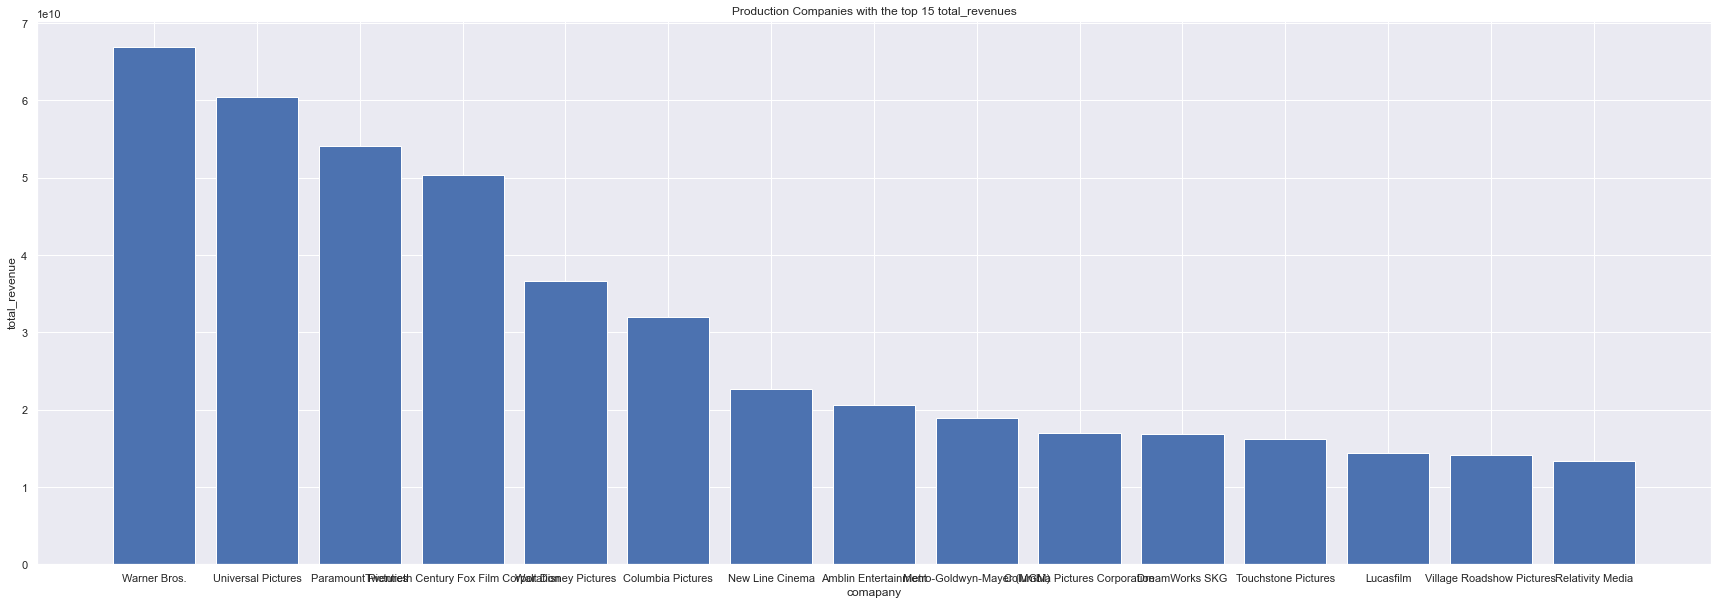

In [547]:
plt.bar(df_company_top_revenue['company'], df_company_top_revenue['total_revenue'])
plt.xlabel('comapany')
plt.ylabel('total_revenue')
plt.title('Production Companies with the top 15 total_revenues')

> **Warner Bros**  tops the list of production company with the most revenue with total revenue of 66968810000, followed by **Universal Pictures** with total revenue of 60474370000, **Paramount Pictures** with 54130690000, **Twentieth Century Fox Film Corporation** with 50370670000 and **Walt Disney Pictures** with 36678570000 who are the top5 companies with the most revenue

In [626]:
#get row of movies who made profit and the one with loss
loss_comp = df_1[df_1['profit_loss_%']  < 0]
prof_comp = df_1[df_1['profit_loss_%']  > 0]

In [627]:
#get list of companies that appeared in movies that made loss
loosing_company = []
for i in loss_comp['production_companies'].astype(str):
    i = i.split("|")
    for j in i:
        loosing_company.append(j)

In [628]:
#get list of companies that appeared in movies that made loss
profit_company = []
for i in prof_comp['production_companies'].astype(str):
    i = i.split("|")
    for j in i:
        profit_company.append(j)

In [651]:
#get comapnies in the list lossing-company who never appeared in profit_companies
# these are production companies who never made profit
never_made_prof =[]
for i in loosing_company:
    if i not in profit_company:
        never_made_prof.append(i)

In [657]:
never_made_profit = df_company_budget_revenue['company'].isin(never_made_prof)
has_atleast_3movie = (df_company_budget_revenue['movies_count']>2)
df_company_always_loss = df_company_budget_revenue[never_made_profit & has_atleast_3movie]
df_company_always_loss

,company,total_budget,movies_count,average_budget,total_revenue,average_revenue,profit_loss%
309,H2F Entertainment,1.883859e+08,3,6.279528e+07,1.485062e+08,4.950206e+07,-21.17
762,Foresight Unlimited,8.298101e+07,6,1.383017e+07,1.308292e+07,2.180487e+06,-84.23
841,Magnolia Pictures,6.578669e+07,5,1.315734e+07,1.814753e+07,3.629507e+06,-72.41
897,Linson Entertainment,1.116262e+08,4,2.790655e+07,7.224232e+07,1.806058e+07,-35.28
1381,Blue Star Pictures,1.028077e+08,3,3.426923e+07,6.963567e+07,2.321189e+07,-32.27
1383,Rhombus Media,6.528641e+07,4,1.632160e+07,3.494726e+07,8.736815e+06,-46.47
1418,Persistent Entertainment,7.720494e+07,3,2.573498e+07,2.321941e+07,7.739805e+06,-69.92
1439,Rai Cinema,7.359285e+07,3,2.453095e+07,2.308786e+07,7.695952e+06,-68.63
1447,Paradox Entertainment,1.398218e+08,4,3.495546e+07,5.890946e+07,1.472737e+07,-57.87
1459,Lipsync Productions,8.448020e+07,6,1.408003e+07,2.027896e+07,3.379827e+06,-76.00


Text(0.5, 1.0, 'Production Companies with the most loss in percentage')

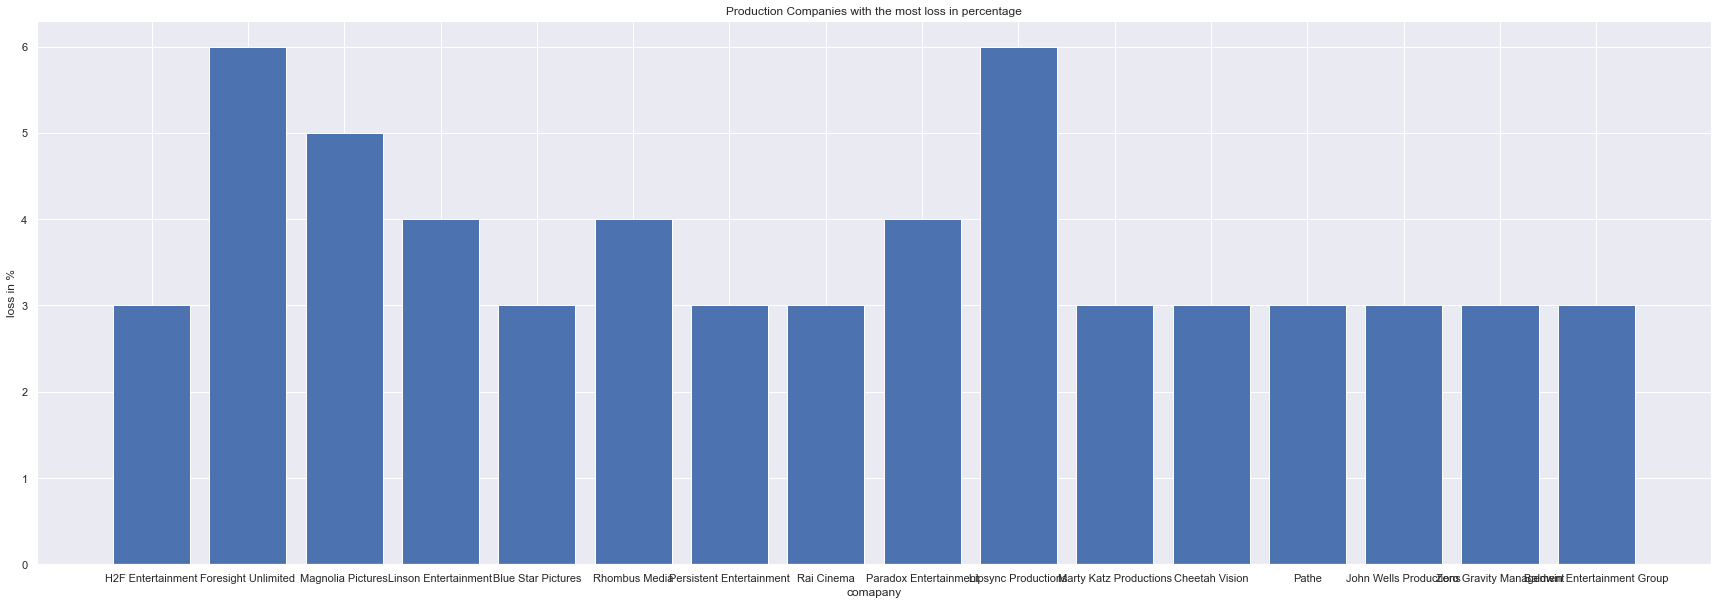

In [661]:
plt.bar(df_company_always_loss['company'], df_company_always_loss['movies_count'])
plt.xlabel('comapany')
plt.ylabel('loss in %')
plt.title('Production Companies with the most loss in percentage')

> the bar chart above is of comapny with at least 3 movies and who made loss% in all movies individually, **this is different from average loss**. **Foresight Unlimited** tops with making loss in all 6 movies it produces with average loss of -84.23%, followed by **Lipsync Productions** also with 6 movies and with -76% loss, **Magnolia Pictures** with 5 movies and -72.41% and **Linson Entertainment, Rhombus Media and Paradox Entertainment** who all made loss in all 4 movies produced with -35.28%, -46.47% and -57.87% respectively

In [659]:
df_company_always_loss

,company,total_budget,movies_count,average_budget,total_revenue,average_revenue,profit_loss%
309,H2F Entertainment,1.883859e+08,3,6.279528e+07,1.485062e+08,4.950206e+07,-21.17
762,Foresight Unlimited,8.298101e+07,6,1.383017e+07,1.308292e+07,2.180487e+06,-84.23
841,Magnolia Pictures,6.578669e+07,5,1.315734e+07,1.814753e+07,3.629507e+06,-72.41
897,Linson Entertainment,1.116262e+08,4,2.790655e+07,7.224232e+07,1.806058e+07,-35.28
1381,Blue Star Pictures,1.028077e+08,3,3.426923e+07,6.963567e+07,2.321189e+07,-32.27
1383,Rhombus Media,6.528641e+07,4,1.632160e+07,3.494726e+07,8.736815e+06,-46.47
1418,Persistent Entertainment,7.720494e+07,3,2.573498e+07,2.321941e+07,7.739805e+06,-69.92
1439,Rai Cinema,7.359285e+07,3,2.453095e+07,2.308786e+07,7.695952e+06,-68.63
1447,Paradox Entertainment,1.398218e+08,4,3.495546e+07,5.890946e+07,1.472737e+07,-57.87
1459,Lipsync Productions,8.448020e+07,6,1.408003e+07,2.027896e+07,3.379827e+06,-76.00


#### <a id='conclusions'></a>
## Conclusions

>it is observed that movies who are popular tends to have more revenue and profit%, so to incerase revenue, producers should try to promote their movie to gain more popularity.

>some certain casts appears to have more average revenue and profit% in movies they appeared in than others than others, these casts may be the viewers choices who inturn increases the revenue and profit% of movies

>some certain director appears to have  **less revenue**  than budget(who run at loss) and **loss%** than others, these directors movies may be avoided for investors who may want to invest in movies

>some cerntain gernes also appears to have more revenue and profits than others just like **documentary and music movies** shows to be the best interms of profit on average, Foreign movies appears to had a loss of -1.28% on average.

> some certain companies made loss in all movies they did, production Companies like these should be avoided especiallynthose with atleast 3 movies

### Limitations
> Limitation of this analysis may be not getting enough data, just like how a **Oren Peli** who directed a movie had 203346200% profit and **Haxan Films**  production company with only one movies who had 991900% profit, this may be confusing because most of director has have highest average profit on movies they directed are director with just one movies in the dataset

